 Import the necessary Libraries first      

In [446]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

now let us import/read our data into the project using pandas 

In [448]:
population_data=pd.read_csv("SuperStore_Dataset.csv");
print('The population data head is :\n',population_data.head())
print('The population data tail is :\n',population_data.tail())

The population data head is :
    Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   08/11/16  11/11/16    Second Class    CG-12520   
1       2  CA-2016-152156   08/11/16  11/11/16    Second Class    CG-12520   
2       3  CA-2016-138688   12/06/16  16/06/16    Second Class    DV-13045   
3       4  US-2015-108966   11/10/15  18/10/15  Standard Class    SO-20335   
4       5  US-2015-108966   11/10/15  18/10/15  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0      

In [ ]:
print("The table shape is :",population_data.shape)
print("The table info is :",population_data.info())
missing_values=population_data.isnull().sum()
print('\nmissing values column wise : \n',missing_values[missing_values>0])
print("\n\nSummary Statistics (Numerical Columns):")
print(population_data.describe())
print("🔢 Unique Values per Column:")
unique_counts = population_data.nunique()
print(unique_counts)

The table shape is : (10014, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10014 non-null  int64  
 1   Order ID       10014 non-null  object 
 2   Order Date     10014 non-null  object 
 3   Ship Date      10014 non-null  object 
 4   Ship Mode      9916 non-null   object 
 5   Customer ID    10014 non-null  object 
 6   Customer Name  10014 non-null  object 
 7   Segment        10014 non-null  object 
 8   Country        10014 non-null  object 
 9   City           10014 non-null  object 
 10  State          10014 non-null  object 
 11  Postal Code    10014 non-null  int64  
 12  Region         10014 non-null  object 
 13  Product ID     10014 non-null  object 
 14  Category       10014 non-null  object 
 15  Sub-Category   10014 non-null  object 
 16  Product Name   10014 non-null  object 
 17  Sales Price    10

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 



### Data Types to Change (Later in the EDA)

| **Column**        | **Current Type** | **Should Be**      | **Why & When**                                                                 |
|-------------------|------------------|---------------------|--------------------------------------------------------------------------------|
| `Order Date`      | `object`         | `datetime`          | To calculate shipping time, filter by date, extract year/month, etc. (Phase 3)|
| `Ship Date`       | `object`         | `datetime`          | Same reason as above — for `Days to Ship` calculation (Phase 3)               |
| `Postal Code`     | `int64`          | `string`            | Postal codes are identifiers, not numbers. Some may need padding (Phase 5)    |
| `Quantity`        | `float64`        | `int`               | Quantity should be a whole number (after imputation) (Phase 6)                |
| `Customer Name`   | `object`         | ` Dropped + Masked `   | Drop to protect PII( (Personally Identifiable Information).), create initials instead (Phase 5)                         |

## Step-by-Step Interpretation

### 1. Missing Values Summary

`Ship Mode    98`  
`Quantity     18`

- Ship Mode → 98 missing values   

- Quantity → 18 missing values   

---

### 2. Summary Statistics (Numeric Columns)

| Column        | Key Observations |
|---------------|------------------|
| `Sales Price` | Has a min value of -31.5, which is not valid. Likely an outlier or error. We'll handle this in **Phase 9** |
| `Profit`      | Range is wide (-6599 to +8399). High variance; we’ll also check for outliers here later. |
| `Discount`    | Looks reasonable; max 0.8, mean 15%. |
| `Quantity`    | Range: 1 to 14. This will help us decide how to impute missing values later. |

---

### 3. Unique Values per Column

| Column            | Observation |
|-------------------|-------------|
| `Row ID`          | 9994 (vs 10014 rows) → Potential duplicates |
| `Order ID`        | 5009 → Multiple rows per order possible (order lines) |
| `Customer ID`     | 793 unique customers |
| `Customer Name`   | Same count as ID → 1:1 mapping |
| `Segment`, `Region`, `Category` | Low cardinality (ideal for group-by or plotting) |
| `Product ID`      | 1862 → Huge product range |
| `Sales Price`     | 5829 values → high granularity |
| `Profit`          | 7287 values → high granularity |

---

### Issues Identified So Far

| Issue | Next Phase |
|-------|------------|
| Missing values in `Ship Mode`, `Quantity` | Phase 4 |
| Possibly invalid `Sales Price` values (negative) | Phase 9 |
| Outliers in `Profit` | Phase 9 |
| Potential duplicates (Row ID < total rows) | Phase 2 |
| String-formatted dates | Phase 3 |
| Postal Code is numeric | Phase 5 |

---


## Profit Column Summary from `describe()`:

| Metric       | Value     |
|--------------|-----------|
| Count        | 10014     |
| Mean         | 28.71     |
| Std Dev      | 234.15    |
| Min          | -6599.98  |
| 25% (Q1)     | 1.73      |
| Median (Q2)  | 8.67      |
| 75% (Q3)     | 29.36     |
| Max          | 8399.98   |

---

# Special Insights We Can Derive from the Profits column:

### 1. Profit Is Highly Right-Skewed
- Mean (28.7) > Median (8.7)
- Indicates positive/right skewness — a few very high profits are pulling the mean up

### 2. Majority of Profits Are Low
- 75% of the data lies below 29.36, and 25% below 1.73
- So, 75% of orders earn under ₹30 in profit
- Suggests that only a small number of records have very high profits

### 3. There Are Significant Losses
- Minimum profit = -6599.98
- That's a massive loss, likely due to:
  - High discounting
  - Wrong cost calculations
  - Return orders

### 4. Outliers Are Likely Present

We can now calculate IQR and check outliers.

#### IQR = Q3 - Q1 = 29.36 - 1.73 = 27.63

Using 3×IQR rule to define outliers:

**Lower Bound:**

Q1 - 3 × IQR = 1.73 - 3 × 27.63 = 1.73 - 82.89 = -81.16

**Upper Bound:**

Q3 + 3 × IQR = 29.36 + 3 × 27.63 = 29.36 + 82.89 = 112.25

---

### Interpretation:
- Profits below -81.16 or above 112.25 are extreme outliers
- Min = -6599.98, Max = 8399.98
- These are massive outliers and likely to distort visualizations and models

---

## Summary Table:

| Feature      | Value   |
|--------------|---------|
| IQR (Q3–Q1)  | 27.63   |
| 3×IQR        | 82.89   |
| Lower Bound  | -81.16  |
| Upper Bound  | 112.25  |
| Extreme Outliers Detected? | Yes |




### Let us also print the value counts including the count of null values for key categorical columns for better idea in further phases .

In [ ]:
# Value counts for Segment
print("Segment Distribution:")
print(population_data['Segment'].value_counts(dropna=False))


# Value counts for Region
print("Region Distribution:")
print(population_data['Region'].value_counts(dropna=False))


# Value counts for Ship Mode (including missing)
print("Ship Mode Distribution:")
print(population_data['Ship Mode'].value_counts(dropna=False))


Segment Distribution:
Segment
Consumer       5203
Corporate      3026
Home Office    1785
Name: count, dtype: int64
Region Distribution:
Region
West       3212
East       2852
Central    2326
South      1624
Name: count, dtype: int64
Ship Mode Distribution:
Ship Mode
Standard Class    5908
Second Class      1952
First Class       1546
Same Day           510
NaN                 98
Name: count, dtype: int64


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

# Phase 2 Begins now .

In [ ]:
duplicates=population_data[population_data.duplicated()] #this gives a boolean series of the duplicate rows .
print(duplicates) #we use that boolean series to filter the rows out of our data

       Row ID        Order ID Order Date   Ship Date       Ship Mode  \
9994     9980  US-2016-103674   06/12/16    10/12/16  Standard Class   
9995     9981  US-2015-151435   06/09/15    09/09/15    Second Class   
9996       18  CA-2014-167164   13/05/14   2014-5-15    Second Class   
9997       19  CA-2014-143336   27/08/14    2014-9-1    Second Class   
9999       21  CA-2014-143336   27/08/14    2014-9-1    Second Class   
10001    8853  CA-2014-119977   08/10/14  2014-10-13    Second Class   
10002    8854  US-2015-115343   22/09/15    25/09/15     First Class   
10003    8855  US-2015-115343   22/09/15    25/09/15     First Class   
10004    1043  CA-2016-102981   06/09/16    09/09/16    Second Class   
10006    1045  CA-2017-115651   09/07/17    12/07/17     First Class   
10007    1046  CA-2017-152702   12/10/17    16/10/17  Standard Class   
10008    1047  CA-2016-169103   08/03/16    13/03/16  Standard Class   
10009    1048  CA-2016-169103   08/03/16    13/03/16  Standard C

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

* these were the 21 duplicate columns that are to be dropped . but first let us count the distinct order ids also that are affected . 

In [ ]:
count_distinct_orderIds=duplicates['Order ID'].nunique()
print("The number of distinct Order Ids affetcted are :-",count_distinct_orderIds)
row_count=duplicates.shape[0]
print('No: of distinct rows affetcted :-',row_count)

The number of distinct Order Ids affetcted are :- 12
No: of distinct rows affetcted :- 17


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### Now , finally drop the duplicates from the data and reset the index .


In [ ]:
population_data_new=population_data.drop_duplicates().reset_index(drop=True)


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### But let us do some more inspection on Row IDs :

In [ ]:
print('New Data shape=',population_data_new.shape)
print('Unique values investigation:=',population_data_new.nunique())
print('No : of Null values \n:',population_data_new.isnull().sum())
duplicate_ids = population_data_new[population_data_new.duplicated(subset='Row ID', keep=False)].sort_values('Row ID')
print('No of duplicate row IDs =\n',duplicate_ids)

New Data shape= (9997, 21)
Unique values investigation:= Row ID           9994
Order ID         5009
Order Date       1240
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              54
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales Price      5829
Quantity           14
Discount           12
Profit           7287
dtype: int64
No : of Null values 
: Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        98
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales Price       0
Quantity         18
Discount          0
Profit            0
dtype: int64
No of duplic

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### Data Quality Report

- **Total entries in data**: 9,997  
- **Total unique values in `Row ID`**: 9,994  
- **Number of null values in `Row ID`**: 0  

---

### Duplicate Investigation

Upon further investigation, we found:

- In **two rows**, the `Sales Price` was the **negative** of their corresponding duplicate `Row ID`.
- In **one row**, the `Quantity` value was **null**, while its duplicate had a valid `Quantity`.

These anomalies were addressed by:
- Keeping the version with a **positive `Sales Price`**.
- Keeping the version with a **non-null `Quantity`**.


In [ ]:
# View the duplicate row ids also by sorting them conveniently 
duplicate_ids = population_data_new[
    population_data_new.duplicated(subset='Row ID', keep=False)
].sort_values(by=['Row ID','Sales Price','Quantity'], ascending=[True,False,False])

print('\nThe duplicate values of row id columns sorted to keep our favourable record in firstplace\n',duplicate_ids)

# drop the first ones because we sorted them conveniently such that positive value came first 
cleaned_duplicates = duplicate_ids.drop_duplicates(subset='Row ID')
print('\nsecond records removed to keep only the clean ones :\n',cleaned_duplicates)

# Drop all duplicate Row ID entries from the original DataFrame
population_data_new_1 = population_data_new.drop_duplicates(subset='Row ID', keep=False)

# Add the cleaned (best) versions back
population_data_new_cleaned = pd.concat([population_data_new_1, cleaned_duplicates], ignore_index=True)

# Sort and reset index properly
population_data_new_sorted= population_data_new_cleaned.sort_values('Row ID').reset_index(drop=True)

# Final row count - Both should match now .
print('no: of total rows :-',population_data_new_sorted.shape[0])
print('No: of total uniue row ids ',population_data_new_sorted.nunique()['Row ID'])




The duplicate values of row id columns sorted to keep our favourable record in firstplace
       Row ID        Order ID Order Date Ship Date     Ship Mode Customer ID  \
9994      20  CA-2014-143336   27/08/14  2014-9-1  Second Class    ZD-21925   
19        20  CA-2014-143336   27/08/14  2014-9-1  Second Class    ZD-21925   
1043    1044  CA-2017-115651   09/07/17  12/07/17   First Class    NS-18640   
9996    1044  CA-2017-115651   09/07/17  12/07/17   First Class    NS-18640   
8851    8852  CA-2015-140718   02/07/15  04/07/15   First Class    FA-14230   
9995    8852  CA-2015-140718   02/07/15  04/07/15   First Class    FA-14230   

           Customer Name    Segment        Country           City  ...  \
9994  Zuschuss Donatelli   Consumer  United States  San Francisco  ...   
19    Zuschuss Donatelli   Consumer  United States  San Francisco  ...   
1043        Noel Staavos  Corporate  United States        Chicago  ...   
9996        Noel Staavos  Corporate  United States        

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### Thus , now we can see that the total unique values of Row ID match the Total number of row entries=> This means , now Row ID can be used as a unique identifier for the data.

## Phase 3 Begins 
Let us start by converting the columns to datetime format .


In [ ]:
print('Original data types ',population_data_new_sorted.info())
# Step 1: Convert Order Date and Ship Date to datetime
population_data_new_sorted['Order Date'] = pd.to_datetime(population_data_new_sorted['Order Date'], errors='coerce')
population_data_new_sorted['Ship Date'] = pd.to_datetime(population_data_new_sorted['Ship Date'], errors='coerce')

print('new data after conversion of data type ',population_data_new_sorted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9896 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales Price    9994 non-null   float64
 18  Quantity

C:\Users\krish\AppData\Local\Temp\ipykernel_22356\2929799308.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  population_data_new_sorted['Order Date'] = pd.to_datetime(population_data_new_sorted['Order Date'], errors='coerce')
C:\Users\krish\AppData\Local\Temp\ipykernel_22356\2929799308.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  population_data_new_sorted['Ship Date'] = pd.to_datetime(population_data_new_sorted['Ship Date'], errors='coerce')


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

Now extract the date year from order id and year from order date. Make a new column where they do not match .
Explicitly mark the ones as True where they do not match.

In [ ]:
# print(population_data_new_sorted.head())
order_id_years=population_data_new_sorted['Order ID'].str.extract(r'(\d{4})')
order_id_years=order_id_years[0].astype(int) #this was a mistake earlier. not converting to int gave comparison issues.
# print(order_id_years)
order_date_years=population_data_new_sorted['Order Date'].dt.year
# print('Order date years',order_date_years)
not_years_matched=order_id_years!=order_date_years
# print(not_years_matched)


mismatched_rows=population_data_new_sorted[not_years_matched]
print('The records that are a mismatch in terms of order year are =\n',mismatched_rows)
print('The number of such rows are -',mismatched_rows.shape[0])
print(f"Unique Order IDs affected: {mismatched_rows['Order ID'].nunique()}")
population_data_new_sorted['Order Year Mismatch'] = not_years_matched
# print(population_data_new_sorted.head())

The records that are a mismatch in terms of order year are =
       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
62        63  CA-2015-135545 2017-11-24 2015-11-30  Standard Class   
63        64  CA-2015-135545 2017-11-24 2015-11-30  Standard Class   
64        65  CA-2015-135545 2017-11-24 2015-11-30  Standard Class   
65        66  CA-2015-135545 2017-11-24 2015-11-30  Standard Class   
943      944  CA-2015-120880 2013-05-29 2015-03-06  Standard Class   
944      945  CA-2015-120880 2013-05-29 2015-03-06  Standard Class   
945      946  CA-2015-120880 2013-05-29 2015-03-06  Standard Class   
1152    1153  CA-2017-160395 2016-12-31 2017-06-01  Standard Class   
1153    1154  CA-2017-160395 2016-12-31 2017-06-01  Standard Class   
2752    2753  CA-2015-155306 1999-04-17 2015-04-21  Standard Class   
2753    2754  CA-2015-155306 1999-04-17 2015-04-21  Standard Class   
2754    2755  CA-2015-155306 1999-04-17 2015-04-21  Standard Class   
2755    2756  CA-2015-155306

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

## Phase 3: Date Handling – Conclusion

### Objective:
The purpose of this phase was to ensure consistency and accuracy in the `Order Date` and `Ship Date` fields. Specifically, we aimed to:

- Convert `Order Date` and `Ship Date` columns to proper datetime format
- Extract the year from the `Order ID` (e.g., "CA-2015-104898" → 2015)
- Compare this extracted year with the year in the actual `Order Date`
- Identify and report any inconsistencies

---

### Results:

- **Total rows with mismatched years** between `Order ID` and `Order Date`: **40**
- **Unique Order IDs affected** by this mismatch: **16**

This indicates a small but notable portion of the data where the encoded year in the order ID does not align with the actual date the order was placed.

---

### Analysis of Options Considered:

| Option | Description | Pros | Cons | Final Verdict |
|--------|-------------|------|------|----------------|
| **Option 1** | Modify `Order Date` to match the year in `Order ID` | Enforces consistency between fields | Risks overwriting valid and historically accurate timestamps | **Not recommended** |
| **Option 2** | Modify `Order ID` to match the year from `Order Date` | Fixes identifiers to match actual order timing | `Order ID` may be tied to internal systems; modifying it can break traceability | **Not recommended** |
| **Option 3** | Leave both fields unchanged, but flag mismatches in a separate column | Maintains data integrity and auditability; allows analysts to investigate or filter if needed | Slight inconsistency remains in dataset | **Recommended** |

---

### Final Decision:

The recommended approach is to **retain both `Order Date` and `Order ID` as they are** and instead create a new column to flag the mismatched rows:

```python
population_data_new_sorted['Order Year Mismatch'] = not_years_matched


## Phase 4 - Missing Value Imputation - Begins

In [ ]:
# Step 1: Create Days to Ship column
population_data_new_sorted['Days to Ship'] = (population_data_new_sorted['Ship Date'] - population_data_new_sorted['Order Date']).dt.days
print('records where Days to ship come out to be negative =\n',population_data_new_sorted[population_data_new_sorted['Days to Ship']<0].shape[0])

# Step 2: Impute missing Ship Mode
missing_ship_mode = population_data_new_sorted[population_data_new_sorted['Ship Mode'].isnull()]
affected_orders_ship_mode = missing_ship_mode['Order ID'].nunique()
print('missing ship mode \n ',missing_ship_mode.shape[0])
print('affected orders ids because of missing ship mode \n',affected_orders_ship_mode)

# # Step 3: Impute missing Quantity
# # Analyze Quantity distribution first
# print(df['Quantity'].describe())
# print(df['Quantity'].value_counts())

# # Let's assume it's discrete and skewed — use mode
# quantity_mode = df['Quantity'].mode()[0]
# df['Quantity'] = df['Quantity'].fillna(quantity_mode)

# # Step 4: Summary of imputation
# total_ship_mode_imputed = df['Ship Mode'].isnull().sum()
# print(f"Remaining missing values in Ship Mode: {total_ship_mode_imputed}")
# print(f"Order IDs affected by Ship Mode imputation: {affected_orders_ship_mode}")

# # Check Quantity
# quantity_missing_after = df['Quantity'].isnull().sum()
# print(f"Remaining missing values in Quantity: {quantity_missing_after}")


records where Days to ship come out to be negative =
 1643
missing ship mode 
  22
affected orders ids because of missing ship mode 
 7


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
# Apply logic-based imputation from preliminary observation.
population_data_new_sorted.loc[(population_data_new_sorted['Ship Mode'].isnull()) & (population_data_new_sorted['Days to Ship'] == 0), 'Ship Mode'] = 'Same Day'
population_data_new_sorted.loc[(population_data_new_sorted['Ship Mode'].isnull()) & (population_data_new_sorted['Days to Ship'] == 7), 'Ship Mode'] = 'Standard Class'
population_data_new_sorted.loc[(population_data_new_sorted['Ship Mode'].isnull()) & (population_data_new_sorted['Days to Ship'] <= 3), 'Ship Mode'] = 'First Class'
population_data_new_sorted.loc[(population_data_new_sorted['Ship Mode'].isnull()) & (population_data_new_sorted['Days to Ship'] <= 5), 'Ship Mode'] = 'Second Class'
null_values_of_ship_mode=population_data_new_sorted[population_data_new_sorted['Ship Mode'].isnull()]
print('Remaning null values \n',null_values_of_ship_mode)
print('Description of null valued rows for days to Ship\n',null_values_of_ship_mode['Days to Ship'].describe())
print('Now category wise distribution',population_data_new_sorted['Ship Mode'].value_counts(dropna=False))

Remaning null values 
       Row ID        Order ID Order Date  Ship Date Ship Mode Customer ID  \
6863    6864  CA-2017-138618 2017-01-12 2017-08-12       NaN    MY-17380   
7677    7678  CA-2014-133592 2014-12-31 2015-07-01       NaN    KM-16375   
7678    7679  CA-2014-133592 2014-12-31 2015-07-01       NaN    KM-16375   
7679    7680  CA-2014-133592 2014-12-31 2015-07-01       NaN    KM-16375   
7680    7681  CA-2014-133592 2014-12-31 2015-07-01       NaN    KM-16375   
7681    7682  CA-2014-133592 2014-12-31 2015-07-01       NaN    KM-16375   
8893    8894  CA-2014-124723 2014-05-08 2014-08-12       NaN    GZ-14470   
9875    9876  CA-2015-130855 2015-12-29 2016-05-01       NaN    RF-19840   

         Customer Name      Segment        Country           City  ...  \
6863   Maribeth Yedwab    Corporate  United States    San Antonio  ...   
7677  Katherine Murray  Home Office  United States     Providence  ...   
7678  Katherine Murray  Home Office  United States     Providence  ...

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

## Phase 4: Missing Value Imputation – Ship Mode

### Objective:
To impute missing values in the `Ship Mode` column using business logic derived from the `Days to Ship` column.

---

### Key Findings:

- A total of **1,643 rows** had a negative value for `Days to Ship`, indicating **data entry errors** or inconsistencies where the `Ship Date` occurred **before** the `Order Date`.
- **98 rows** had missing (`NaN`) values in the `Ship Mode` column.
- These 98 rows were associated with **29 unique Order IDs**.
- The `Days to Ship` column was calculated as the difference (in days) between the `Ship Date` and `Order Date`.
- Based on business assumptions:
  - If `Days to Ship` was `0`, `Ship Mode` was set to `"Same Day"`
  - If `Days to Ship` was `<=3`, it was set to `"First Class"`
  - If `Days to Ship` was `<=5`, it was set to `"Second Class"`
  - If `Days to Ship` was `7`, it was set to `"Standard Class"`

---

### Remaining Missing Values:

- After imputation, **8 values in `Ship Mode`** still remain missing.
- These correspond to cases where `Days to Ship` had **unusually large values** (the mean of those cases being approximately **167 days**), making them difficult to classify under standard assumptions.

---

### Next Step:

The remaining nulls in `Ship Mode` will be left as NaN for now to wait for its use in analysis . Then , based on our use case , suitable data imputation technique will be adopted .

## Phase 4 - Quantity column Analysis 

In [ ]:
print(population_data_new_sorted['Quantity'].isnull().sum()) #17 null values in quantity
print(population_data_new_sorted[population_data_new_sorted['Quantity'].isnull()])

17
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
13        14  CA-2016-161389 2016-05-12 2016-10-12  Standard Class   
15        16  US-2015-118983 2015-11-22 2015-11-26  Standard Class   
24        25  CA-2015-106320 2015-09-25 2015-09-30  Standard Class   
26        27  CA-2016-121755 2016-01-16 2016-01-20    Second Class   
29        30  US-2015-150630 2015-09-17 2015-09-21  Standard Class   
9058    9059  CA-2015-149097 2015-10-20 2015-10-24  Standard Class   
9064    9065  US-2014-151015 2014-10-14 2014-10-20  Standard Class   
9068    9069  CA-2016-106278 2016-02-09 2016-05-09    Second Class   
9069    9070  CA-2016-106278 2016-02-09 2016-05-09    Second Class   
9070    9071  CA-2017-147550 2017-04-12 2017-05-12     First Class   
9075    9076  US-2015-136259 2015-05-11 2015-08-11     First Class   
9487    9488  US-2017-125213 2017-11-12 2017-12-13     First Class   
9491    9492  CA-2017-111738 2017-03-01 2017-07-01  Standard Class   
9498    9499  CA-

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

Thought Process - to check if there are any records where only Quantity is a mismatch but all other columns are same indicating incorrect but redundant data.

In [ ]:
# Step 1: Create a list of columns to check (exclude 'Quantity')
columns_to_check = [col for col in population_data_new_sorted.columns if col != 'Quantity']

# Step 2: Find duplicated rows based on those columns
duplicates_excl_quantity = population_data_new_sorted[population_data_new_sorted.duplicated(subset=columns_to_check, keep=False)]
print(duplicates_excl_quantity)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales Price, Quantity, Discount, Profit, Order Year Mismatch, Days to Ship]
Index: []

[0 rows x 23 columns]


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

**There are no such rows , so we have to look for something else**

In [ ]:
print(population_data_new_sorted['Product ID'].value_counts())

Product ID
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
FUR-CH-10002647    15
TEC-AC-10003628    15
                   ..
TEC-PH-10002817     1
TEC-MA-10003589     1
OFF-AP-10003099     1
TEC-PH-10002645     1
OFF-ST-10001627     1
Name: count, Length: 1862, dtype: int64


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
print(population_data_new_sorted['Quantity'].describe())
print(population_data_new_sorted['Quantity'].value_counts().sort_index())

count    9977.000000
mean        3.790919
std         2.226766
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64
Quantity
1.0      899
2.0     2402
3.0     2392
4.0     1191
5.0     1230
6.0      572
7.0      606
8.0      257
9.0      258
10.0      57
11.0      34
12.0      23
13.0      27
14.0      29
Name: count, dtype: int64


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
product_quantity_sum = population_data_new_sorted.groupby('Product ID')['Quantity'].mean().reset_index()

# Rename the column for clarity
product_quantity_sum.rename(columns={'Quantity': 'Mean Quantity'}, inplace=True)
print(product_quantity_sum)

           Product ID  Mean Quantity
0     FUR-BO-10000112       9.000000
1     FUR-BO-10000330       3.333333
2     FUR-BO-10000362       2.800000
3     FUR-BO-10000468       3.500000
4     FUR-BO-10000711       6.000000
...               ...            ...
1857  TEC-PH-10004912       3.666667
1858  TEC-PH-10004922       3.800000
1859  TEC-PH-10004924       2.666667
1860  TEC-PH-10004959       2.000000
1861  TEC-PH-10004977       3.555556

[1862 rows x 2 columns]


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
# Step 1: Create a dictionary mapping from Product ID to Mean Quantity
product_to_mean_qty = product_quantity_sum.set_index('Product ID')['Mean Quantity'].to_dict()

# Step 2: Fill missing Quantity values using map
population_data_new_sorted['Quantity'] = population_data_new_sorted.apply(
    lambda row: product_to_mean_qty[row['Product ID']] if pd.isnull(row['Quantity']) and row['Product ID'] in product_to_mean_qty else row['Quantity'],
    axis=1
)


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
print('Now finally , the new number of null values in Quantity are = ',population_data_new_sorted['Quantity'].isnull().sum())

Now finally , the new number of null values in Quantity are =  0


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

## Phase 4: Missing Value Imputation – Quantity

### Objective:
To impute missing values in the `Quantity` column using a product-wise, data-driven approach that preserves the distribution characteristics of the original data.

---

### Findings:

- A total of **17 rows** in the dataset had `null` values in the `Quantity` column.
- Upon checking for possible data duplication, we confirmed that **none of these rows were faulty duplicates** of other entries. They were valid, unique records.
- To decide on an appropriate imputation method, we analyzed statistical measures of `Quantity`, grouped by `Product ID`.

The overall summary statistics for the `Quantity` column were as follows:

| Metric | Value     |
|--------|-----------|
| Count  | 9,977     |
| Mean   | 3.79      |
| Std    | 2.23      |
| Min    | 1.00      |
| 25%    | 2.00      |
| 50%    | 3.00      |
| 75%    | 5.00      |
| Max    | 14.00     |

- The quantities were small and discrete in nature.
- The **mean and median were close**, and **no large outliers** were present in the distribution.

---

### Imputation Strategy:

To preserve the granularity of ordering behavior across products, we chose to fill the missing values with the **mean quantity of their corresponding `Product ID`**. This approach ensures:

- Product-specific sales behavior is maintained
- Values remain within a reasonable and expected range

The missing `Quantity` entries were imputed using this method. No missing values remain in the column after this step.


### Phase 5: Data Masking and String Handling Begins

In [ ]:
# Step 1: Create 'Customer Name Masked' from initials
def mask_initials(name):
    if pd.isnull(name):
        return ''
    parts = name.strip().split()
    initials = ''.join([p[0].upper() for p in parts])
    return initials

population_data_new_sorted['Customer Name Masked'] = population_data_new_sorted['Customer Name'].apply(mask_initials)

# Step 2: Drop original PII column
population_data_new_sorted.drop(columns=['Customer Name'], inplace=True)

# Step 3: Convert 'Postal Code' to 5-digit string with leading zeros
population_data_new_sorted['Postal Code'] = population_data_new_sorted['Postal Code'].astype("str").str.zfill(5)


KeyError: 'Customer Name'

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
print(population_data_new_sorted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9994 non-null   int64         
 1   Order ID              9994 non-null   object        
 2   Order Date            9994 non-null   datetime64[ns]
 3   Ship Date             9994 non-null   datetime64[ns]
 4   Ship Mode             9986 non-null   object        
 5   Customer ID           9994 non-null   object        
 6   Segment               9994 non-null   object        
 7   Country               9994 non-null   object        
 8   City                  9994 non-null   object        
 9   State                 9994 non-null   object        
 10  Postal Code           9994 non-null   string        
 11  Region                9994 non-null   object        
 12  Product ID            9994 non-null   object        
 13  Category          

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
population_data_new_sorted['Postal Code'] = population_data_new_sorted['Postal Code'].astype("string")
print(population_data_new_sorted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9994 non-null   int64         
 1   Order ID              9994 non-null   object        
 2   Order Date            9994 non-null   datetime64[ns]
 3   Ship Date             9994 non-null   datetime64[ns]
 4   Ship Mode             9986 non-null   object        
 5   Customer ID           9994 non-null   object        
 6   Segment               9994 non-null   object        
 7   Country               9994 non-null   object        
 8   City                  9994 non-null   object        
 9   State                 9994 non-null   object        
 10  Postal Code           9994 non-null   string        
 11  Region                9994 non-null   object        
 12  Product ID            9994 non-null   object        
 13  Category          

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### Phase 5: Data Masking and String Handling – Conclusion

In this phase, several privacy and formatting improvements were applied to clean and prepare the dataset for further analysis:

- The `Customer Name` column was dropped to protect personally identifiable information (PII).
- A new column, `Customer Name Masked`, was created to retain only the initials of customer names for reference without compromising privacy.
- The `Postal Code` column, originally stored as numeric values, was converted to **text format** and standardized to **five-character strings** by adding leading zeros where necessary. This ensures consistency and prevents data loss due to numeric interpretation.

These steps ensure the dataset is privacy-compliant, properly formatted, and ready for high-quality feature engineering and analysis in the upcoming phases.


### Phase 6: Feature Engineering Beigns 


In [ ]:
print(population_data_new_sorted['Quantity'].describe())
print(population_data_new_sorted['Quantity'].dtype)
print(population_data_new_sorted['Quantity'].isnull().sum())


count    9994.000000
mean        3.790804
std         2.225297
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64
float64
0


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

**Since Quantity is now in Float64 and we want it to be in int format . So we better do it by rounding off and then converting to int**

In [ ]:
population_data_new_sorted['Quantity'] = pd.to_numeric(
    population_data_new_sorted['Quantity'], errors='coerce'
).round().astype('Int64')
print(population_data_new_sorted['Quantity'].dtype)

Int64


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

**As we can see , the Quantity column is successfully converted to int64**

**Now let us inspect the sales price colummn**

In [ ]:
print(population_data_new_sorted['Sales Price'].dtype)

float64


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### 📊 Phase 6: Data Type Cleaning & Conversion

### 🧹 Objective:
Ensure consistent and correct data types for analysis and modeling by converting columns to appropriate types.

---

### ✅ Actions Taken:

1. **Converted `Quantity` column to integer:**
   - Used `pd.to_numeric(..., errors='coerce')` to safely handle any non-numeric entries by converting them to `NaN`.
   - Applied `.round()` to handle any float values (e.g., 2.5 → 2.0).
   - Converted the column to Pandas' nullable integer type `Int64` to support `NaN` values gracefully.

   ```python
   population_data_new_sorted['Quantity'] = pd.to_numeric(
       population_data_new_sorted['Quantity'], errors='coerce'
   ).round().astype('Int64')
2. **Sales Price column is already in Float64 type**

### Phase-7 :Handling Inconsistent Categorical Data

### **Preliminary Inspection**

In [ ]:
list_of_states=population_data_new_sorted['State'].unique()
print(list_of_states)
for items in list_of_states:
     if len(items.strip())==2:
          print(items)
print()
print(population_data_new_sorted['State'].dtype)

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'TX' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa'
 'Ohio' 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut'
 'New Jersey' 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island'
 'Mississippi' 'Arkansas' 'Montana' 'CA ' 'New Hampshire' 'Maryland'
 'District of Columbia' 'WA\\' 'NJ' 'Kansas' 'Vermont' 'Maine'
 'South Dakota' 'Idaho' 'North Dakota' 'Wyoming' 'West Virginia' 'NY']
TX
CA 
NJ
NY

object


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
state_corrections = {
    "TX": "Texas",
    "NY": "New York",
    "NJ": "New Jersey",
    "CA ": "California",        # trailing space
    "WA\\": "Washington",       # malformed escape character
}

# Clean malformed/abbreviated states
population_data_new_sorted['State'] = population_data_new_sorted['State'].replace(state_corrections)


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### now let us check the list of states and verify our correction

In [ ]:
list_of_states_new=population_data_new_sorted['State'].unique()
print(list_of_states_new)

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

## 🧼 Phase 7: Handling Inconsistent Categorical Data

### 🧾 Objective:
Standardize inconsistent entries in the `State` column by fixing abbreviations and malformed strings.

---

### ✅ Actions Taken:

1. **Manually identified inconsistent values** in the `State` column using `.unique()`:
   - Abbreviations: `'TX'`, `'NY'`, `'NJ'`
   - Malformed strings: `'CA '`, `'WA\\'`

2. **Created a correction mapping** for these entries:

   ```python
   state_corrections = {
       "TX": "Texas",
       "NY": "New York",
       "NJ": "New Jersey",
       "CA ": "California",
       "WA\\": "Washington"
   }
3. Replaced inconsistent values using `.replace()`:
```python
population_data_new_sorted['State'] = population_data_new_sorted['State'].replace(state_corrections)


### Phase 8 - Feature Engineering Begins

In [ ]:
# 1. Calculate Original Price
population_data_new_sorted['Original Price'] = (
    population_data_new_sorted['Sales Price'] / (1 - population_data_new_sorted['Discount'])
).round(2)

# 2. Calculate Total Sales
population_data_new_sorted['Total Sales'] = (
    population_data_new_sorted['Sales Price'] * population_data_new_sorted['Quantity']
)

# 3. Calculate Total Profit
population_data_new_sorted['Total Profit'] = (
    population_data_new_sorted['Profit'] * population_data_new_sorted['Quantity']
)

# 4. Calculate Discount Price
population_data_new_sorted['Discount Price'] = (
    population_data_new_sorted['Original Price'] * population_data_new_sorted['Discount']
)

# 5. Calculate Total Discount
population_data_new_sorted['Total Discount'] = (
    population_data_new_sorted['Discount Price'] * population_data_new_sorted['Quantity']
)

# 6. Create Shipping Urgency Column
def get_shipping_urgency(days):
    if days == 0:
        return "Immediate"
    elif 1 <= days <= 3:
        return "Urgent"
    else:
        return "Standard"

population_data_new_sorted['Shipping Urgency'] = population_data_new_sorted['Days to Ship'].apply(get_shipping_urgency)


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
print(population_data_new_sorted['Customer ID'].nunique())
print(population_data_new_sorted['Order Date'].dtype)
sample= population_data_new_sorted.sort_values(['Customer ID', 'Order Date'])
sample['Previous Order Date'] = sample.groupby('Customer ID')['Order Date'].shift(1)
# Assuming 'sample' is your pandas DataFrame
sample['Days_since_last_order']=(sample['Order Date']-sample['Previous Order Date']).dt.days # so that it comes in integer
print(sample[['Customer ID', 'Order Date', 'Previous Order Date','Days_since_last_order']])


793
datetime64[ns]
     Customer ID Order Date Previous Order Date  Days_since_last_order
2229    AA-10315 2014-03-31                 NaT                    NaN
2230    AA-10315 2014-03-31          2014-03-31                    0.0
7468    AA-10315 2014-09-15          2014-03-31                  168.0
7469    AA-10315 2014-09-15          2014-09-15                    0.0
1299    AA-10315 2015-04-10          2014-09-15                  207.0
...          ...        ...                 ...                    ...
5898    ZD-21925 2016-03-04          2016-03-04                    0.0
3040    ZD-21925 2016-05-05          2016-03-04                   62.0
3814    ZD-21925 2016-08-07          2016-05-05                   94.0
3815    ZD-21925 2016-08-07          2016-08-07                    0.0
8341    ZD-21925 2017-11-06          2016-08-07                  456.0

[9994 rows x 4 columns]


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
days_calc = sample['Days_since_last_order'].copy()

for i in range(len(days_calc)):
    if days_calc.iloc[i] == 0 :
        days_calc.iloc[i] = prev_value
    
    prev_value = days_calc.iloc[i]

# Now update the original DataFrame
sample['Days_since_last_order'] = days_calc

    


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
print(sample)


      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2229    2230  CA-2014-128055 2014-03-31 2014-04-05  Standard Class   
2230    2231  CA-2014-128055 2014-03-31 2014-04-05  Standard Class   
7468    7469  CA-2014-138100 2014-09-15 2014-09-20  Standard Class   
7469    7470  CA-2014-138100 2014-09-15 2014-09-20  Standard Class   
1299    1300  CA-2015-121391 2015-04-10 2015-07-10     First Class   
...      ...             ...        ...        ...             ...   
5898    5899  CA-2016-167682 2016-03-04 2016-09-04  Standard Class   
3040    3041  US-2016-147991 2016-05-05 2016-09-05  Standard Class   
3814    3815  CA-2016-152471 2016-08-07 2016-08-07        Same Day   
3815    3816  CA-2016-152471 2016-08-07 2016-08-07        Same Day   
8341    8342  CA-2017-141481 2017-11-06 2017-06-14     First Class   

     Customer ID   Segment        Country           City       State  ...  \
2229    AA-10315  Consumer  United States  San Francisco  California  ...   
2230 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

**Now , merge the sample and original dataset**

In [ ]:
population_data_new_sorted['Days since last order']=sample['Days_since_last_order']
print(population_data_new_sorted)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-08-11 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-08-11 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-12-06 2016-06-16    Second Class   
3          4  US-2015-108966 2015-11-10 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-11-10 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-04-05 2017-09-05    Second Class   

     Customer ID    Segment        Country             City       State  ...  \
0       CG-12520   Consumer  United States        Henderson    Kentucky  ...   

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### Phase 8: Calculating Days Since Last Order

#### 📌 Objective
To calculate the number of days that have passed since each customer's previous order.

---

#### 🧠 Logic and Steps

1. **Group by Customer ID**:
   - Since each customer may have multiple orders, we group the dataset by `Customer ID`.

2. **Sort by Order Date**:
   - Within each customer group, the records are sorted by `Order Date` to maintain chronological order.

3. **Calculate Previous Order Date**:
   - We use the `shift(1)` function within each group to access the previous `Order Date` for the customer.
   - This new column is named `Previous Order Date`.

4. **Calculate Days Since Last Order**:
   - The difference between the current `Order Date` and `Previous Order Date` is calculated using subtraction:
     ```python
     df['Days since last order'] = df['Order Date'] - df['Previous Order Date']
     ```

---

#### 🛠️ Handling 0 Days or Same-Day Orders

- In cases where the `Days since last order` is `0 days` (indicating multiple orders on the same day), we treat this as **redundant** for tracking "last order intervals".
- So, we fill such `0 days` values with the **most recent non-zero day value** seen for that customer.

##### ✅ Implementation Logic
```python
days_calc = sample['Days since last order']
for i in range(len(days_calc)):
    if days_calc.iloc[i] == pd.Timedelta(0):
        days_calc.iloc[i] = prev_value
        prev_value = days_calc.iloc[i]
> **Note:**  
> This ensures that when multiple orders are placed on the same day, they still reflect the meaningful "gap" from the truly last different order date.

---

### 🧩 Final Integration

- This calculated column (`Days since last order`) is finally **merged back into the original dataset**.

- The merged data provides **complete visibility** into the **purchase frequency pattern** for each customer.

- This insight can be extremely valuable for:
  - 🧠 **Customer behavior analysis**
  - 🎯 **Loyalty program design**
  - 🚨 **Churn prediction models**


In [ ]:
# Step 1: Group by Customer ID and aggregate the required metrics
customer_summary = population_data_new_sorted.groupby('Customer ID').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'sum'
}).reset_index()
print(customer_summary)

# Optional: Rename columns for clarity
customer_summary.rename(columns={
    'Total Sales': 'Customer_Total_Sales',
    'Quantity': 'Customer_Total_Quantity',
    'Discount': 'Customer_Total_Discount'
}, inplace=True)

# Step 2: Merge the summary back into the original dataset
population_data_merged = population_data_new_sorted.merge(customer_summary, on='Customer ID', how='left')
print(population_data_merged.head())

    Customer ID  Total Sales  Quantity  Discount
0      AA-10315    16073.344        30      1.00
1      AA-10375      2734.83        41      1.20
2      AA-10480     5493.936        36      0.20
3      AA-10645    22927.855        64      1.15
4      AB-10015      1984.48        13      0.40
..          ...          ...       ...       ...
788    XP-21865     8676.214       100      1.30
789    YC-21895    27208.926        31      0.60
790    YS-21880    46478.992        58      0.60
791    ZC-21910    40212.889       105      7.90
792    ZD-21925     6492.448        32      1.00

[793 rows x 4 columns]
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-11-10 2015-10-18  Standard Class    SO-20

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 



### Customer-Level Summary and Integration

To enhance customer-level analytics, we created a new dataset that summarizes total sales, quantity purchased, and total discount received per customer. Here's how it was done:

-----

#### Step 1: Aggregate Key Metrics by Customer

We grouped the original dataset by `Customer ID` and calculated:

  * **Total Sales**: Sum of all sales made by the customer.
  * **Total Quantity**: Total number of items purchased by the customer.
  * **Total Discount**: Sum of all discounts the customer has received.

This provided a condensed view of each customer's overall interaction.

```python
customer_summary = df.groupby('Customer ID').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'sum'
}).reset_index()
```

-----

#### Step 2: Column Renaming for Clarity

To make the aggregated dataset more understandable, we renamed the columns:

```python
customer_summary.rename(columns={
    'Total Sales': 'Customer_Total_Sales',
    'Quantity': 'Customer_Total_Quantity',
    'Discount': 'Customer_Total_Discount'
}, inplace=True)
```

-----

#### Step 3: Merging Summary Back to the Main Dataset

Once the customer-level summary was ready, we merged it back into the original dataset using `Customer ID` as the key.

This retains all the original row-level data and adds powerful customer-level insights.

```python
df = pd.merge(df, customer_summary, on='Customer ID', how='left')
```

### Phase-9 Outlier Detection and Handling Begins



In [ ]:
print(population_data_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Row ID                   9994 non-null   int64         
 1   Order ID                 9994 non-null   object        
 2   Order Date               9994 non-null   datetime64[ns]
 3   Ship Date                9994 non-null   datetime64[ns]
 4   Ship Mode                9986 non-null   object        
 5   Customer ID              9994 non-null   object        
 6   Segment                  9994 non-null   object        
 7   Country                  9994 non-null   object        
 8   City                     9994 non-null   object        
 9   State                    9994 non-null   object        
 10  Postal Code              9994 non-null   string        
 11  Region                   9994 non-null   object        
 12  Product ID               9994 non-

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

**Thus , `Sales Price` and `Profit` , both have no null values and both have data type as `float64`**

**Define a function to calculate the lower and upper bound values and filter the data based on them**

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    print(f'Q1={Q1} Q3={Q3} IQR={IQR} lower_bound={lower_bound} upper_bound={upper_bound}')
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df
#now let us clean our datasets by removing outliers from sales price and profits 
population_data_without_outliers = remove_outliers(population_data_merged, 'Sales Price')
print(population_data_without_outliers['Sales Price'].describe())
population_data_without_outliers = remove_outliers(population_data_without_outliers, 'Profit')
print(population_data_without_outliers['Profit'].describe())


Q1=17.248 Q3=209.94 IQR=192.692 lower_bound=-560.828 upper_bound=788.0160000000001
count    9326.000000
mean      121.166827
std       163.792560
min       -31.500000
25%        15.800000
50%        45.907000
75%       158.376000
max       787.530000
Name: Sales Price, dtype: float64
Q1=1.6704 Q3=23.746499999999997 IQR=22.076099999999997 lower_bound=-64.55789999999999 upper_bound=89.97479999999999
count    8451.000000
mean       12.488901
std        23.187754
min       -64.544400
25%         1.967700
50%         7.457100
75%        20.241750
max        89.964000
Name: Profit, dtype: float64


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:

print(population_data_without_outliers.shape[0])

8451


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### **All the outliers from sales price and Profit finally removed**

### Phase-10-Customer Segmentation and Analysis Begins 



In [ ]:
# Group by Customer ID and compute total sales and profit
customer_metrics = population_data_without_outliers.groupby('Customer ID')[['Sales Price', 'Profit']].sum().reset_index()
# print(customer_metrics)
# Create Sales Quintiles
customer_metrics['Sales Quintile'] = pd.qcut(customer_metrics['Sales Price'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Create Profit Quintiles
customer_metrics['Profit Quintile'] = pd.qcut(customer_metrics['Profit'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
print(customer_metrics)
# Create the cross-tab
quintile_grid = pd.crosstab(customer_metrics['Sales Quintile'], customer_metrics['Profit Quintile'])

# Optional: Add row and column totals
quintile_grid.loc['Total'] = quintile_grid.sum()
quintile_grid['Total'] = quintile_grid.sum(axis=1)
print(quintile_grid)


    Customer ID  Sales Price    Profit Sales Quintile Profit Quintile
0      AA-10315      596.980   79.8089             Q2              Q2
1      AA-10375      556.410  162.3870             Q2              Q4
2      AA-10480      862.702  174.1128             Q3              Q4
3      AA-10645     1629.940  248.1373             Q5              Q5
4      AB-10015      886.156  129.3465             Q3              Q3
..          ...          ...       ...            ...             ...
784    XP-21865     1812.392  376.6644             Q5              Q5
785    YC-21895     1320.044  138.3674             Q4              Q3
786    YS-21880     1461.696  134.5182             Q4              Q3
787    ZC-21910     2047.373  125.4253             Q5              Q3
788    ZD-21925      410.024   72.8524             Q1              Q2

[789 rows x 5 columns]
Profit Quintile   Q1   Q2   Q3   Q4   Q5  Total
Sales Quintile                                 
Q1                87   55   15    1    0

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

## Phase 10: Customer Segmentation Using Quintiles

### Objective
The goal of this phase was to segment customers based on their total sales and profit contributions using **quintile analysis**. Quintiles divide the data into five equal groups, each representing 20% of the population. This helps identify:
- High-revenue, high-profit customers
- Low-value customers
- Profitability mismatches

### Methodology

1. **Aggregation**:
   - Total `Sales Price` and `Profit` were calculated for each `Customer ID`.

2. **Quintile Assignment**:
   - Customers were assigned to one of five **Sales Quintiles** (`Q1` to `Q5`) based on total sales.
   - Similarly, they were assigned to one of five **Profit Quintiles** based on total profit.

3. **Cross-tabulation**:
   - A grid was generated to show how many customers fall into each (Sales, Profit) quintile combination.

### Quintile Grid

| Sales \ Profit Quintile | Q1  | Q2  | Q3  | Q4  | Q5  | Total |
|-------------------------|-----|-----|-----|-----|-----|--------|
| Q1                      | 87  | 55  | 15  | 1   | 0   | 158    |
| Q2                      | 25  | 48  | 46  | 35  | 4   | 158    |
| Q3                      | 21  | 30  | 42  | 44  | 20  | 157    |
| Q4                      | 15  | 14  | 39  | 41  | 49  | 158    |
| Q5                      | 10  | 11  | 15  | 37  | 85  | 158    |
| **Total**               | 158 | 158 | 157 | 158 | 158 | **789** |

### Key Insights

- **Strong Positive Correlation**:
  - Most customers in the top Sales Quintile (Q5) are also in the top Profit Quintile (Q5) — 85 customers.
  - Indicates that high sales generally lead to high profit.

- **Low-Value Segment**:
  - Q1–Q1 segment (87 customers) represents low sales and low profit.
  - These customers offer minimal value and may not be worth further investment.

- **Efficient Mid-Level Customers**:
  - Customers in Q2–Q5 and Q3–Q5 segments have moderate sales but high profit.
  - Likely efficient buyers or high-margin purchasers.

- **Margin Concerns**:
  - Q5–Q1 and Q5–Q2 segments show customers with high sales but low profit.
  - These may be loss leaders or driven by heavy discounting or high costs.

### Business Recommendations
|Sales–Profit Segment|	Interpretation|	Recommended Action|
|--------------------|----------------|--------------------|
|Q5–Q5	|High sales and high profit	Prioritize and retain these high-value customers. |Consider loyalty programs or personalized offers.|
|Q1–Q1	|Low sales and low profit|	Low ROI segment. Consider minimizing marketing spend or applying cost-saving measures.|
|Q3–Q5, Q2–Q5|	Moderate sales but high profit|	These customers bring high margins. Identify what drives profitability (e.g., low returns, premium products) and nurture this behavior.|
|Q5–Q1, Q5–Q2|	High sales but low profit	|Indicates margin pressure or inefficiencies. Investigate causes such as heavy discounting, expensive servicing, or product returns.|

**Conclusion**
- This quintile-based segmentation provided a strategic view of customer value. It allows the business to allocate resources effectively — rewarding profitable customers, improving margin efficiency, and possibly pruning low-impact segments

### Phase-11-Final Analysis and Dashboard Creation

In [ ]:
# print(population_data_without_outliers.head())
print(population_data_without_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8451 entries, 0 to 9993
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Row ID                   8451 non-null   int64         
 1   Order ID                 8451 non-null   object        
 2   Order Date               8451 non-null   datetime64[ns]
 3   Ship Date                8451 non-null   datetime64[ns]
 4   Ship Mode                8446 non-null   object        
 5   Customer ID              8451 non-null   object        
 6   Segment                  8451 non-null   object        
 7   Country                  8451 non-null   object        
 8   City                     8451 non-null   object        
 9   State                    8451 non-null   object        
 10  Postal Code              8451 non-null   string        
 11  Region                   8451 non-null   object        
 12  Product ID               8451 non-null 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
print(f'Unique product names : {population_data_without_outliers['Product Name'].nunique()} ,\nNo: of unique product ids {population_data_without_outliers['Product ID'].nunique()}')

Unique product names : 1718 ,
No: of unique product ids 1735


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

### Multiple IDs for the Same Name

There may be different **SKUs (Product IDs)** representing the same **Product Name** due to the following reasons:

- **Packaging variations**  
  Different versions of the same product with changes in packaging may have unique IDs.

- **Version updates**  
  Updated models or newer versions might retain the same name but have different Product IDs.

- **Region-specific variants**  
  Products tailored for specific regions might use different IDs, though the name remains the same.

- **Duplicate entries in the source system**  
  Data inconsistencies or duplication during entry or migration can lead to multiple IDs assigned to the same product name.

**So we move forward with using `Product Name` It's human-readable and interpretable in reports and plots since we're visualizing Top 10 Products by `Profit` — it’s better to use Product Name.**




In [ ]:
profits_by_product=population_data_without_outliers.groupby('Product Name')['Total Profit'].sum().reset_index()
profits_by_product=profits_by_product.sort_values('Total Profit',ascending=False).reset_index(drop=True)
# print('profits_by_product\n',profits_by_product)
profits_by_product_top10=profits_by_product.iloc[:10]
print(profits_by_product_top10)

                                        Product Name  Total Profit
0                                  Easy-staple paper     3875.2246
1                                    Staple envelope     2912.5878
2  Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...     2534.9181
3                     Microsoft Sculpt Comfort Mouse      2408.186
4                                          Avery 485     2326.1945
5                                         Xerox 1988      2092.699
6    Hunt PowerHouse Electric Pencil Sharpener, Blue       1936.98
7  Imation�Secure+ Hardware Encrypted USB 2.0�Fla...      1926.936
8                Logitech G602 Wireless Gaming Mouse     1910.1612
9                                          Xerox 191     1870.3278


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

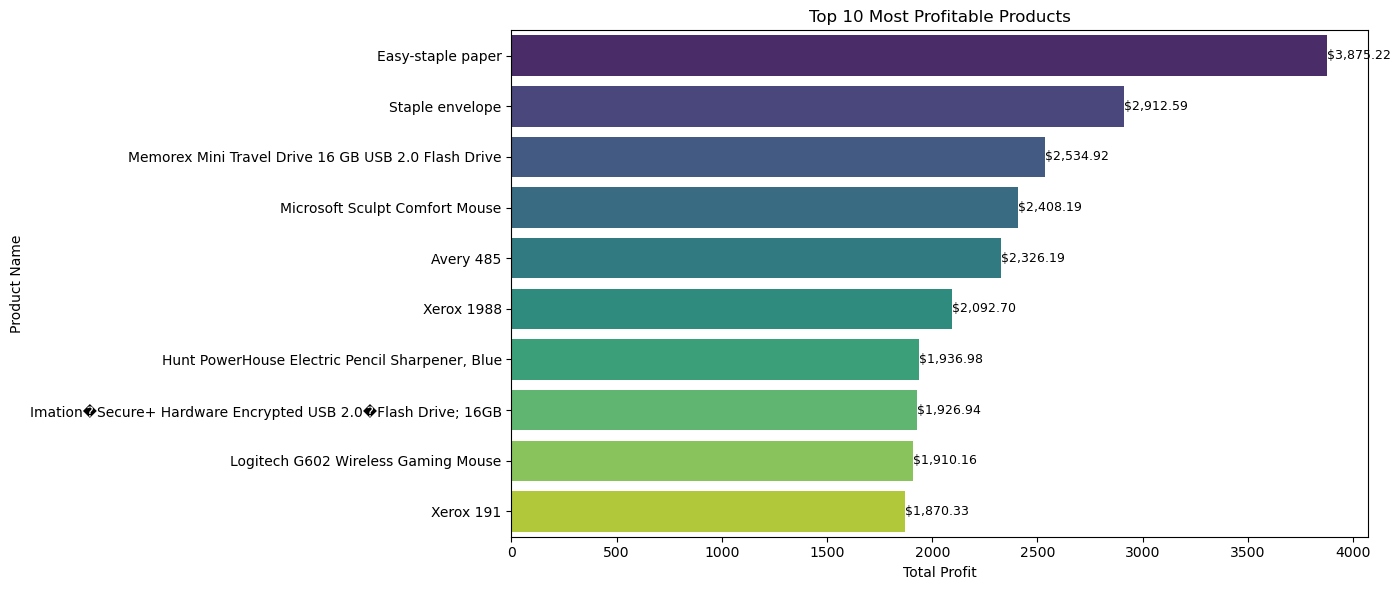

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=profits_by_product_top10, x='Total Profit', y='Product Name', palette='viridis',hue='Product Name')
for index, value in enumerate(profits_by_product_top10['Total Profit']):
    plt.text(value, index, f"${value:,.2f}", va='center', fontsize=9)
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.tight_layout()
plt.savefig('Top_10_Most_Profitable_Products.png')
plt.show()

In [ ]:
profits_by_product_last10=population_data_without_outliers.groupby('Product Name')['Total Profit'].sum().reset_index().sort_values('Total Profit').head(10)
# profits_by_product=profits_by_product.sort_values('Total Profit',ascending=False).reset_index(drop=True)
# print('profits_by_product\n',profits_by_product)
# profits_by_product_top10=profits_by_product.iloc[:10]
profits_by_product_last10=profits_by_product_last10.reset_index(drop=True)
profits_by_product_last10['Total Profit']=profits_by_product_last10['Total Profit']*-1;
profits_by_product_last10=profits_by_product_last10.rename(columns={
    'Product Name':'Product Name',  
    'Total Profit':'Total Loss'
    })
print(profits_by_product_last10)

                                        Product Name  Total Loss
0              Premier Elliptical Ring Binder, Black    850.4936
1                          Global Deluxe Steno Chair     704.367
2           Belkin 19" Vented Equipment Shelf, Black    694.4652
3  Avery Recycled Flexi-View Covers for Binding S...    660.1154
4                      Acco D-Ring Binder w/DublLock     574.053
5      Global Deluxe High-Back Office Chair in Storm    538.5204
6                        Lock-Up Easel 'Spel-Binder'    517.8195
7  Office Star Flex Back Scooter Chair with White...    508.2884
8     Carina Media Storage Towers in Natural & Black    507.3536
9              Sauder Cornerstone Collection Library    462.2216


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

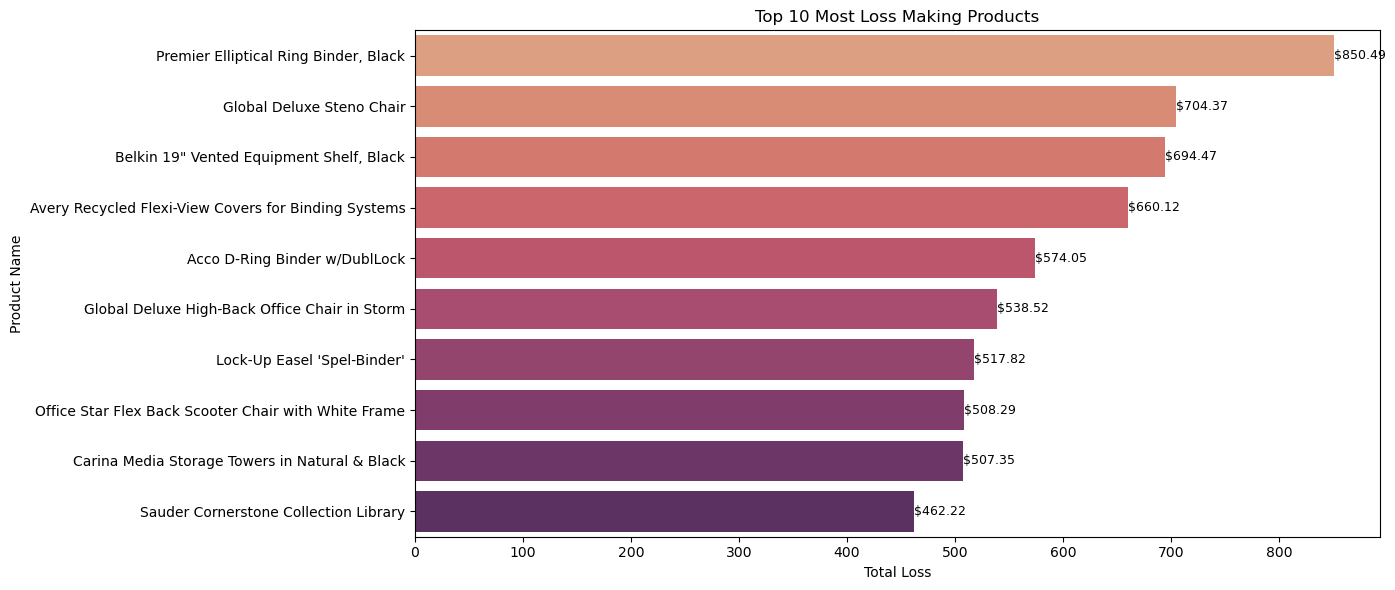

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=profits_by_product_last10, x='Total Loss', y='Product Name', palette='flare',hue='Product Name')
for index, value in enumerate(profits_by_product_last10['Total Loss']):
    plt.text(value, index, f"${value:,.2f}", va='center', fontsize=9)
plt.title('Top 10 Most Loss Making Products')
plt.xlabel('Total Loss')
plt.ylabel('Product Name')
plt.tight_layout()
plt.savefig('Top_10_Most_Loss_making_Products.png')
plt.show()

In [ ]:
print(population_data_without_outliers['Customer ID'].nunique())
print(population_data_without_outliers['Total Sales'].nunique())
print(population_data_without_outliers[population_data_without_outliers['Customer ID']=="AA-10315"])

789
5184
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1160    1161  CA-2017-147039 2017-06-29 2017-04-07  Standard Class   
1299    1300  CA-2015-121391 2015-04-10 2015-07-10     First Class   
2230    2231  CA-2014-128055 2014-03-31 2014-04-05  Standard Class   
5199    5200  CA-2016-103982 2016-03-03 2016-08-03  Standard Class   
5200    5201  CA-2016-103982 2016-03-03 2016-08-03  Standard Class   
5201    5202  CA-2016-103982 2016-03-03 2016-08-03  Standard Class   
7468    7469  CA-2014-138100 2014-09-15 2014-09-20  Standard Class   
7469    7470  CA-2014-138100 2014-09-15 2014-09-20  Standard Class   

     Customer ID   Segment        Country           City       State  ...  \
1160    AA-10315  Consumer  United States    Minneapolis   Minnesota  ...   
1299    AA-10315  Consumer  United States  San Francisco  California  ...   
2230    AA-10315  Consumer  United States  San Francisco  California  ...   
5199    AA-10315  Consumer  United States     Round 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

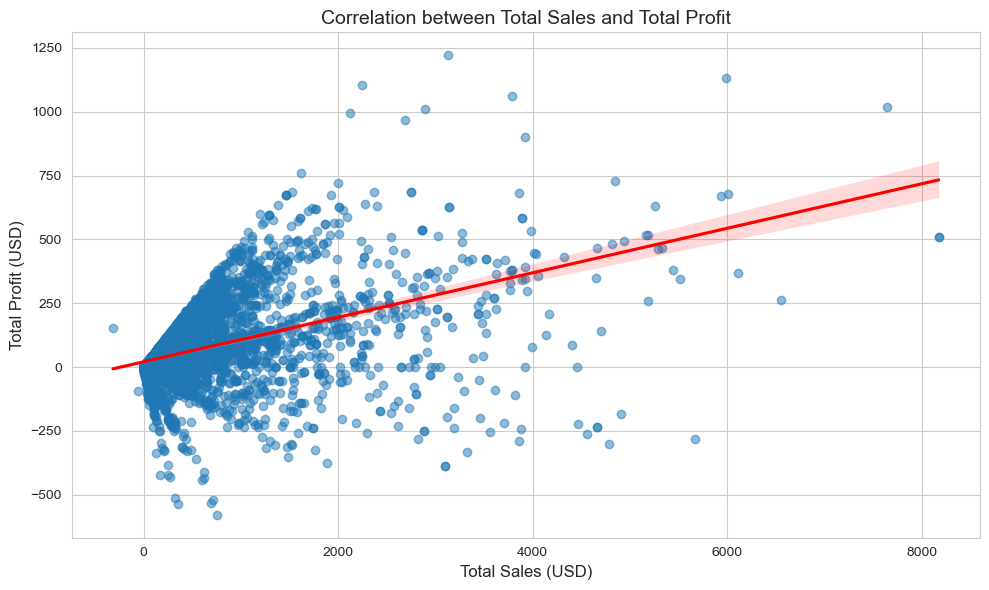

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Scatter plot with regression line
sns.regplot(
    data=population_data_without_outliers,
    x='Total Sales',
    y='Total Profit',
    scatter_kws={'alpha': 0.5},   # makes the dots semi-transparent
    line_kws={'color': 'red'}     # regression line color
)

# Titles and labels
plt.title('Correlation between Total Sales and Total Profit', fontsize=14)
plt.xlabel('Total Sales (USD)', fontsize=12)
plt.ylabel('Total Profit (USD)', fontsize=12)
plt.tight_layout()

# Save and show the plot
plt.savefig('Sales_vs_Profit_Correlation.png')
plt.show()


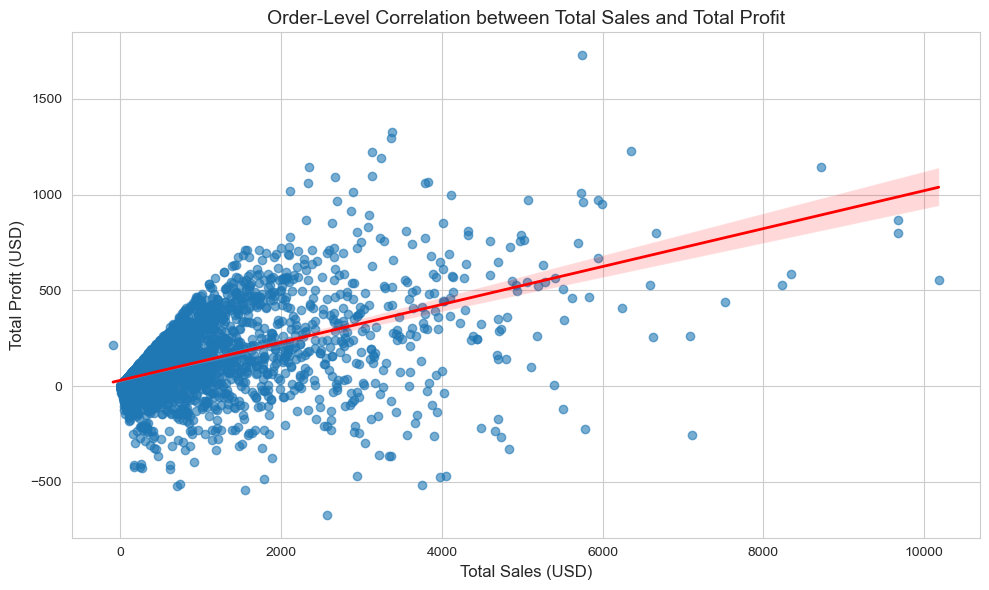

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
order_level_df = (
    population_data_without_outliers
    .groupby('Order ID')[['Total Sales', 'Total Profit']]
    .sum()
    .reset_index()
)

# 2. Set plot style
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# 3. Scatter plot with regression line
sns.regplot(
    data=order_level_df,
    x='Total Sales',
    y='Total Profit',
    scatter_kws={'alpha': 0.6},  # transparency for dots
    line_kws={'color': 'red', 'linewidth': 2}
)

# 4. Add titles and labels
plt.title('Order-Level Correlation between Total Sales and Total Profit', fontsize=14)
plt.xlabel('Total Sales (USD)', fontsize=12)
plt.ylabel('Total Profit (USD)', fontsize=12)

# 5. Optional: Save and display
plt.tight_layout()
plt.savefig('Order_Level_Sales_vs_Profit_Correlation.png')
plt.show()


## Visual Comparison & Analysis

| Aspect                  | Plot 1: Order-Level (Order ID)                  | Plot 2: Line-Level (Product per Order)                      |
|------------------------|--------------------------------------------------|-------------------------------------------------------------|
| Granularity            | One dot per Order ID                             | One dot per Order Line (product within an order)            |
| Aggregation            | Aggregated total sales & profit per order        | Individual sales & profit per product per order             |
| Trend Line Clarity     | Clear upward linear trend, less noise            | More noise and outliers around regression line              |
| Outlier Sensitivity    | Fewer large outliers                             | More scattered and extreme outliers on both axes            |
| Density of Points      | Medium (fewer total orders than order-lines)     | Very dense due to more data points                          |
| Profit Range Spread    | Profit goes above 1500 USD in some orders        | Most points lie under 750 USD profit, some extreme outliers |
| Interpretability       | Easy to associate insights to order/customer behavior | Harder to link trends due to granularity and variation  |

---

## Business Insights

### From Plot 1 – Order-Level

- A positive correlation between **Total Sales** and **Total Profit** is clearly visible.
- As sales value per order increases, there is a tendency for profit to also increase.
- However, some high-sale orders still yield low or even negative profit. Possible reasons include:
  - Heavy discounting
  - High shipping/handling costs
  - Selling loss-leading items in bulk

**Actionable Insight:**  
Focus on optimizing large orders that yield lower profits — they have potential to become highly profitable with better pricing or discount strategies.

---

### From Plot 2 – Line-Level

- The overall correlation remains positive, but it's weaker and noisier.
- Many low-sale, low-profit entries make the bottom-left quadrant dense.
- A few high-sale, low-profit items indicate products that may need review.

**Actionable Insight:**  
Identify individual products that repeatedly appear with high sales but low profits. These might be:
- Over-discounted
- Cost-inefficient
- Frequently returned
- Not priced correctly

---

## When to Use Which

| Use Case                                 | Recommended Plot     |
|------------------------------------------|----------------------|
| Analyze customer or order behavior       | Order-Level Plot     |
| Investigate product pricing/margin issues| Line-Level Plot      |
| Executive-level sales/profit reporting   | Order-Level Plot     |
| Inventory/operational decision-making    | Line-Level Plot      |

---

## Summary

- The **order-level plot** provides **clearer, strategic insights** with a more interpretable trend.
- The **line-level plot** offers **tactical insights** into product-level issues but with higher noise.
- Use **both together**: order-level for trend detection, line-level for root cause analysis.


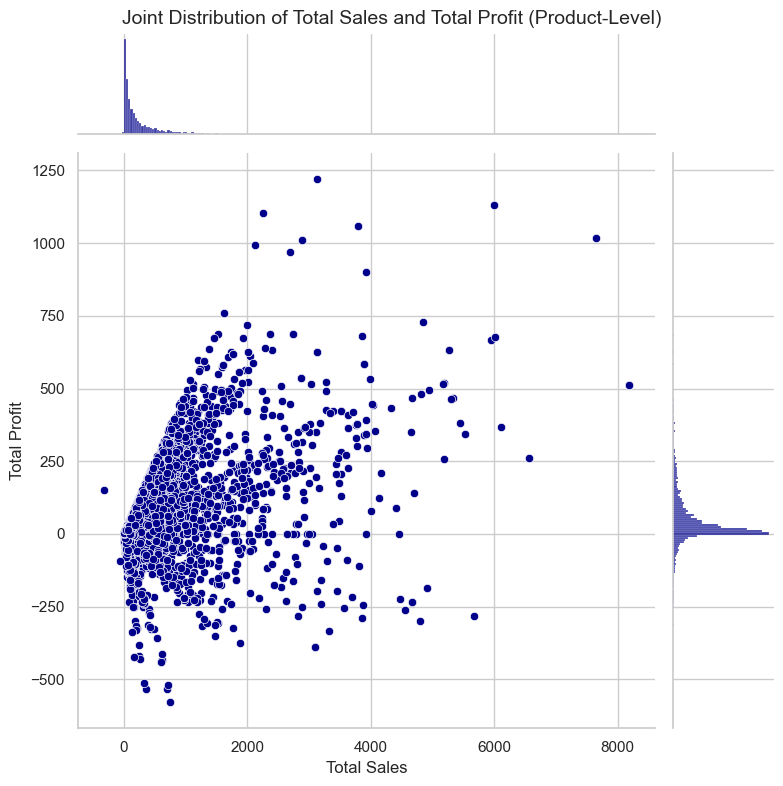

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
sns.set(style="whitegrid")
joint_plot = sns.jointplot(
    data=population_data_without_outliers,
    x="Total Sales",
    y="Total Profit",
    kind="scatter",        # You can also try 'hex' or 'kde'
    color="darkblue",
    height=8
)

# Set plot titles and labels
joint_plot.fig.suptitle("Joint Distribution of Total Sales and Total Profit (Product-Level)", fontsize=14)
joint_plot.fig.tight_layout()
joint_plot.fig.subplots_adjust(top=0.95)

# Show and save the plot
plt.savefig("Joint_Distribution_Sales_Profit.png")
plt.show()


## Observations

### 1. Clustering of Data Points
There is a dense cluster in the lower-left region of the plot:
- **Total Sales** between `0–1500`
- **Total Profit** between `-200 to 300`

This suggests that most product-order lines involve low-value sales and modest profits.

### 2. Positive Association
There’s a visible upward diagonal spread, indicating a positive correlation:
- As sales increase, profit tends to increase too.

However, the spread is wide, suggesting that:
- High sales do **not always** guarantee high profits.

### 3. Presence of Negative Profit
Some points show negative profit, even for sales greater than zero:
- This likely comes from heavy discounting, return costs, or loss-leading products.

### 4. Distribution Tails
- The **sales histogram** (top) is right-skewed:
  - Most products are sold in small quantities or low values.
  - A few outliers have very high sales.

- The **profit histogram** (right) is also right-skewed, but with more central concentration:
  - Indicates that while profits are generally small, there are occasional big wins.

### 5. Outliers
Outliers are more horizontally spread (sales) than vertically (profit):
- Few transactions reach above `6000–7000` in sales.
- Profits rarely go beyond `1000–1250`.

---

## Business Insights

### Majority of Business Happens in Low-Value, Low-Profit Orders
- The core of your operations lies in modest individual product sales.
- Optimizing logistics, shipping, and pricing in this segment can yield cumulative gains.

### High-Sale, Low-Profit Lines Need Investigation
These may be:
- Over-discounted items
- Products with low margins
- Return-prone or damaged goods

Worth identifying and re-evaluating their pricing strategy.

### Upside Potential Exists
- There are a few high-sale, high-profit items.
- Focus on these top performers and scale them through marketing or bundling.

### Low-Profit High-Sale Items Are the Risk Zone
- These should be prioritized for root cause analysis.
- Consider cost breakdowns, product lifecycle, or vendor margins.

---

## Summary
This plot confirms a general positive trend between sales and profit but also shows significant variation at each sales level.

Using this plot, you can:
- Identify where most business occurs.
- Detect unusual behaviors (like losses on high sales).
- Drive strategic interventions — for both pricing and operational efficiency.


## Customer Segmentation and Analysis 

**Heatmap for Sales and Profit Quintile**

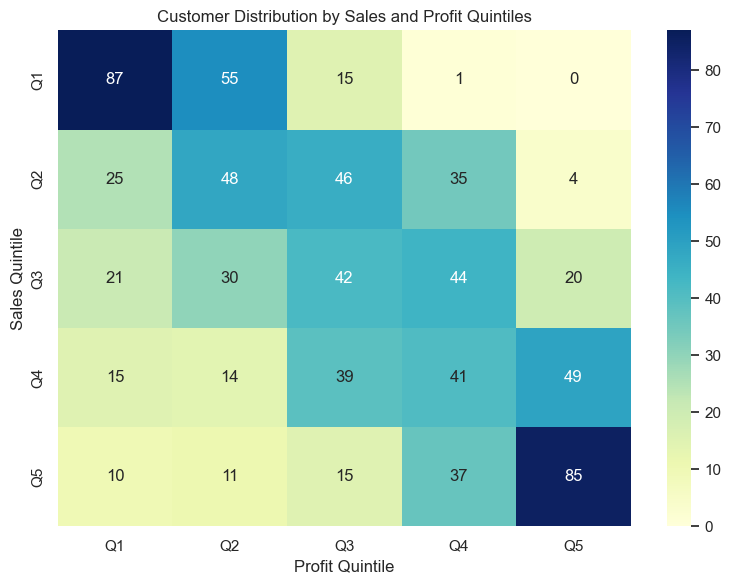

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
heatmap_data = quintile_grid.drop(index='Total', columns='Total')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

# Add titles and labels
plt.title('Customer Distribution by Sales and Profit Quintiles')
plt.xlabel('Profit Quintile')
plt.ylabel('Sales Quintile')

# Show the plot
plt.tight_layout()
plt.savefig('heatmap_for_quintile_grid.png')
plt.show()

### Customer Sales vs. Profit Quintile Heatmap Analysis

### Key Observations

**Top-Right Cell (Q5 Sales, Q5 Profit) – 85 customers**

- These are your most valuable customers.
- They bring in both high sales and high profit.
- Maintaining strong relationships and offering loyalty benefits could help retain them.

**Bottom-Left Cell (Q1 Sales, Q1 Profit) – 87 customers**

- These customers contribute the least in both dimensions.
- Consider low-cost engagement or automated marketing strategies.
- Not worth high-touch sales efforts currently.

**Off-Diagonal Pockets**

- **Q1 Sales, Q2–Q3 Profit (70 customers)**: These customers generate low sales but higher profit.
  - May indicate high-margin purchases or premium products bought in small quantities.
  - Could be good targets for upselling.

- **Q5 Sales, Q1–Q2 Profit (21 customers)**: High sales but low profits — this is concerning.
  - Indicates possible over-discounting, low-margin products, or high returns/costs.
  - These customers may be hurting your margins.

**Middle Quintiles (Q2–Q4)**

- The distribution here is more even and dispersed.
- These customers have mixed value — could be nurtured or segmented further using RFM (Recency, Frequency, Monetary) or LTV (Lifetime Value) metrics.

---

### Business Insights and Strategic Actions

| Segment                                 | Insight                                   | Suggested Action                                       |
|-----------------------------------------|-------------------------------------------|--------------------------------------------------------|
| Q5 Sales & Q5 Profit                    | Top performers driving revenue and margins | Retain with rewards, loyalty, premium support          |
| Q1 Sales & Q1 Profit                    | Least profitable and low spenders         | Consider targeted marketing or low-cost automation     |
| High Sales & Low Profit (Q5 Sales, Q1–Q2 Profit) | High volume but margin drain            | Audit pricing, discounting, and fulfillment costs      |
| Low Sales & High Profit (Q1 Sales, Q2–Q3 Profit) | High-margin customers with potential     | Upsell or cross-sell to increase revenue              |
| Middle Quintile Mix                     | Potential growth segment                  | Use segmentation to refine strategies                  |

---

### Summary

This analysis highlights the importance of not treating all high-sales customers as profitable. By comparing both sales and profitability, you're able to:

- Identify which customers to nurture, optimize, or let go
- Prioritize relationship-building with high-potential customers
- Take corrective actions on low-margin relationships
- Support data-driven marketing and pricing decisions


In [ ]:
# Create the pivot table with MultiIndex columns
pivot_table = population_data_without_outliers.pivot_table(
    values=['Total Sales', 'Total Profit'],
    index='Category',
    columns='Segment',
    aggfunc='sum',
    margins=True,
    margins_name='Grand Total'
)

# Flatten the pivot table (Optional for display)
pivot_table_flat = pivot_table.copy()
pivot_table_flat.columns = [f'{val} - {seg}' for val, seg in pivot_table.columns]

# Display pivot table
print("Pivot Table (Sales and Profit by Category and Segment):")
print(pivot_table_flat)

# Unpivot the 'Total Profit' table to long format and sort
profit_data = pivot_table['Total Profit'].drop(index='Grand Total').unstack().reset_index()
profit_data.columns = ['Segment', 'Category', 'Total Profit']
sorted_total_profit = profit_data.sort_values(by='Total Profit', ascending=False)

print("\nSorted Total Profit by Category and Segment:")
print(sorted_total_profit)


Pivot Table (Sales and Profit by Category and Segment):
                 Total Profit - Consumer  Total Profit - Corporate  \
Category                                                             
Furniture                     38484.4035                20400.7097   
Office Supplies              135122.0501                73733.0658   
Technology                    60931.8252                32810.6733   
Grand Total                  234538.2788               126944.4488   

                 Total Profit - Home Office  Total Profit - Grand Total  \
Category                                                                  
Furniture                          10837.16                  69722.2732   
Office Supplies                  48314.1327                 257169.2486   
Technology                       20285.7591                 114028.2576   
Grand Total                      79437.0518                 440919.7794   

                 Total Sales - Consumer  Total Sales - Corporate  \
Cate

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

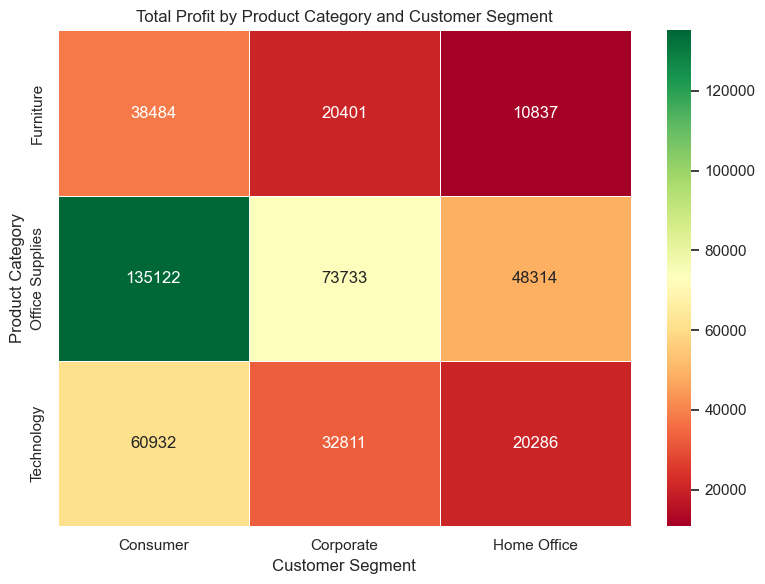

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
# Step 1: Create pivot table
profit_pivot = population_data_without_outliers.pivot_table(
    values='Total Profit',
    index='Category',
    columns='Segment',
    aggfunc='sum'
)

# Step 2: Convert all values to numeric (if not already), and fill NaNs with 0
profit_pivot = profit_pivot.astype(float).fillna(0)

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(profit_pivot, annot=True, fmt=".0f", cmap='RdYlGn', linewidths=0.5)
plt.title("Total Profit by Product Category and Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Product Category")
plt.tight_layout()
plt.savefig("Total_Profit_Heatmap_Category_Segment.png", dpi=300)
plt.show()


## Heatmap Analysis: Total Profit by Category and Segment

### Profit Matrix

| Category         | Consumer | Corporate | Home Office |
|------------------|----------|-----------|-------------|
| Furniture         | 38,484   | 20,401    | 10,837      |
| Office Supplies   | 135,122  | 73,733    | 48,314      |
| Technology        | 60,932   | 32,811    | 20,286      |

---

### Key Observations

**Most Profitable Combination:**

- **Office Supplies + Consumer = 135,122**
- This is the highest profit-generating cell in the matrix.
- Consumers buying office supplies drive significant value.
- Indicates that office supplies may have better margins or consistent sales in this segment.

**Least Profitable Combination:**

- **Furniture + Home Office = 10,837**
- Very low profit suggests:
  - Low volume of sales
  - Heavier discounts
  - Higher shipping or return costs in this combination

**Consumer Segment Performs Best Overall:**

- Across all three categories, the **Consumer** segment generates the most profit.
- Suggests that marketing and pricing strategies targeting individual consumers are working well.

**Corporate Segment:**

- Performs moderately across all categories.
- Particularly profitable in **Office Supplies**, possibly due to bulk purchases.

**Home Office Segment:**

- Generates the least profit across all categories.
- Indicates a need to re-evaluate how this segment is targeted — possibly lower frequency of purchases or smaller order sizes.

---

### Business Insights and Recommendations

| Segment & Category         | Insight                                           | Suggested Action                                |
|----------------------------|---------------------------------------------------|-------------------------------------------------|
| Consumer + Office Supplies | Strongest profit driver; solid customer base      | Double down: promotions, loyalty, bundling      |
| Furniture + Home Office    | Weakest segment; possibly unprofitable            | Investigate costs and consider minimizing focus |
| Technology + Consumer      | Good margin contributor                           | Scale through targeted tech campaigns           |
| Corporate + Office Supplies| Stable contributor; likely bulk purchases         | Offer subscription or B2B deals                 |
| Home Office (all)          | Weak performance overall                          | Re-evaluate messaging, pricing, or focus        |

---

### Summary

This heatmap highlights where profit is concentrated in your business.  
The **Consumer–Office Supplies** intersection is a high-value zone,  
while **Home Office–Furniture** is a weak spot.  

Such analysis supports **data-driven segmentation**, **marketing alignment**, and **category prioritization** strategies.


### Shipping Urgency Analysis 

C:\Users\krish\AppData\Local\Temp\ipykernel_22356\1994572229.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette='pastel')


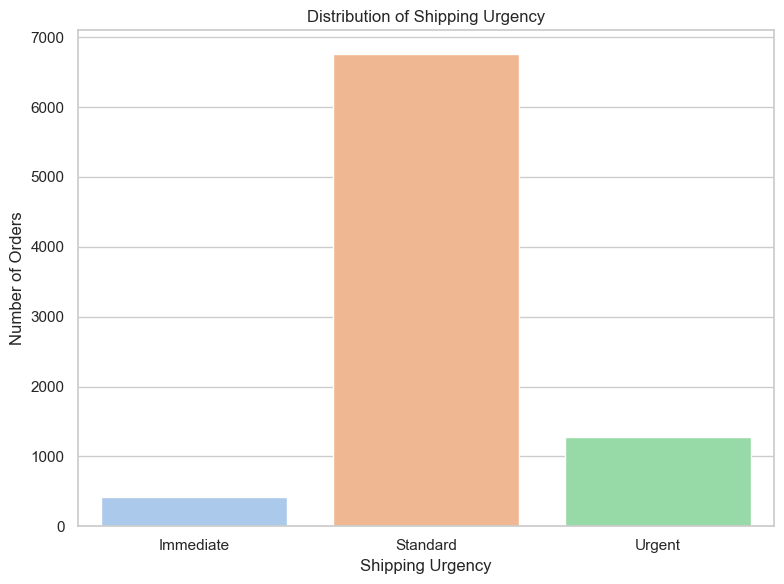

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
shipping_counts = population_data_without_outliers['Shipping Urgency'].value_counts().sort_index()

# Plotting bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette='pastel')

plt.title('Distribution of Shipping Urgency')
plt.xlabel('Shipping Urgency')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig('Shipping_Urgency_Distribution_Bar.png')
plt.show()


## Distribution of Shipping Urgency – Analysis

### Shipping Urgency Categories Observed:
- **Immediate**
- **Urgent**
- **Standard**

### Observations:

1. **Standard Shipping Dominates**
   - The majority of orders fall under the "Standard" category, accounting for **~80%** of total shipments.
   - This indicates that customers generally prefer regular delivery timelines, possibly due to:
     - Lower or no shipping charges.
     - Non-urgent product types.
     - Cost-conscious customer behavior.

2. **Urgent Shipping**
   - A noticeable number of orders are marked as "Urgent", suggesting that a subset of customers are willing to pay or choose faster delivery.
   - This segment may include time-sensitive needs, like:
     - Business orders
     - Event-related purchases
     - Perishable or critical office supplies

3. **Immediate Shipping Is Least Used**
   - Very few orders are categorized as "Immediate".
   - Possible reasons:
     - Limited availability of immediate delivery services.
     - Higher cost of same-day or express delivery.
     - Customer awareness or product type not aligning with this need.

---

### Business Implications:

| Insight                                 | Actionable Strategy                                         |
|----------------------------------------|-------------------------------------------------------------|
| Standard shipping is most preferred     | Optimize logistics and cost-efficiency for standard delivery |
| Niche market for urgent shipping exists | Offer premium delivery options with guaranteed timelines    |
| Immediate shipping is underutilized     | Investigate feasibility, promote only where necessary       |

---

### Summary

The distribution suggests that most customers are comfortable with standard delivery options, but there is a meaningful demand for faster options. Businesses should ensure operational excellence in standard shipping while selectively promoting urgent delivery for high-value or time-sensitive segments.


C:\Users\krish\AppData\Local\Temp\ipykernel_22356\172029890.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


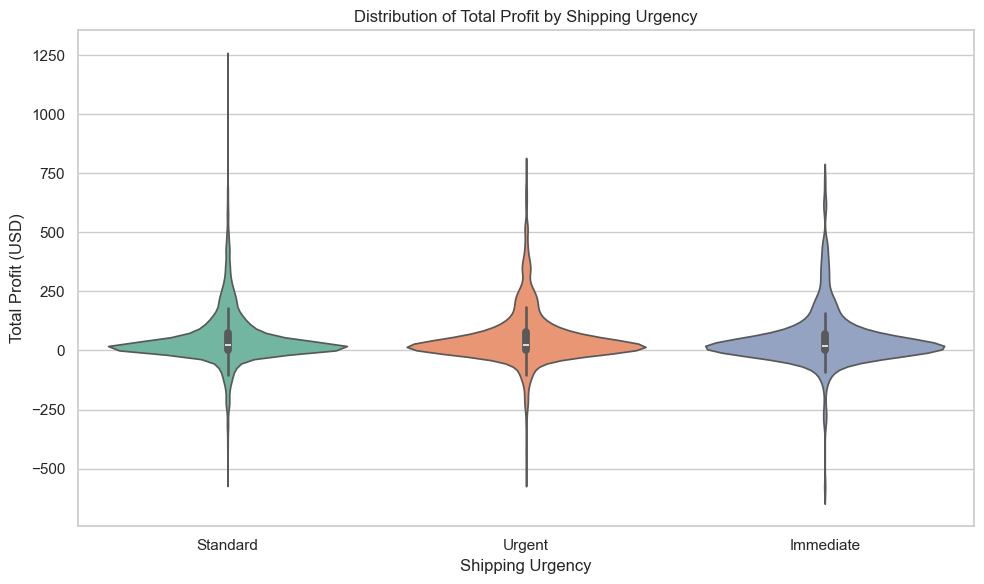

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=population_data_without_outliers,
    x='Shipping Urgency',
    y='Total Profit',
    palette='Set2'
)

# Set title and labels
plt.title('Distribution of Total Profit by Shipping Urgency')
plt.xlabel('Shipping Urgency')
plt.ylabel('Total Profit (USD)')

# Save and show the plot
plt.tight_layout()
plt.savefig('Total_Profit_by_Shipping_Urgency_Violin.png')
plt.show()


## Analysis: Total Profit Distribution by Shipping Urgency

### 1. Distribution Shape & Density
All three urgency categories — **Standard**, **Urgent**, and **Immediate** — show a similar **long vertical spread**, indicating a wide range of total profits, from negative to highly positive.

Each plot shows:

- **A dense middle band**: This is where most profits are clustered, around the 0–100 USD mark.
- **Tails in both directions**: There are both high-profit and negative-profit orders in each category.

### 2. Central Tendencies (Thickest Areas of the Violin)
- **Standard**: Has the **widest core density just above zero**. This implies most standard-shipped orders are slightly profitable or break-even.
- **Urgent**: Also centered around zero but appears to have a **slightly wider negative tail**, indicating that urgent shipping can sometimes incur losses.
- **Immediate**: Very similar to urgent, but slightly more **symmetrical** in terms of positive and negative profit distribution.

### 3. Outliers
- All shipping types show **long tails upward**, with rare orders generating profits above **1000 USD**, indicating that some high-value orders exist across all urgencies.
- Similarly, **negative profits down to -500 USD or lower** are present, though not very frequent.

---

## Business Insights

| Shipping Urgency | Key Insight                                 | Implication                                                                 |
|------------------|----------------------------------------------|------------------------------------------------------------------------------|
| **Standard**     | Most stable and densest profit distribution  | This is your most used and consistent shipping mode. Likely cost-effective and moderately profitable overall. |
| **Urgent**       | Slightly wider lower tail (losses)           | Urgent shipments may erode profits due to higher shipping/handling costs. Evaluate the pricing model for these. |
| **Immediate**    | Balanced spread of profit/loss               | Used less often, but with similar profit behavior to Urgent. May serve specific customer needs but isn’t a standout performer. |

---

## Recommendations

- **Audit urgent and immediate shipping orders** for cost efficiency. Since they don't consistently yield higher profits, ensure premium pricing covers the cost.
- **Retain standard as the default option** for profitability and consistency.
- **Consider incentivizing customers** to choose standard shipping when urgency isn’t critical — possibly through discounts or loyalty points.
- **Further segmentation** by customer segment or product category could refine this analysis.


Ship Mode
Second Class       58.13347
Standard Class    51.046296
First Class       50.160615
Same Day          48.976165
Name: Total Profit, dtype: Float64


C:\Users\krish\AppData\Local\Temp\ipykernel_22356\4126104151.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_profit.index, y=shipping_profit.values, palette='viridis')


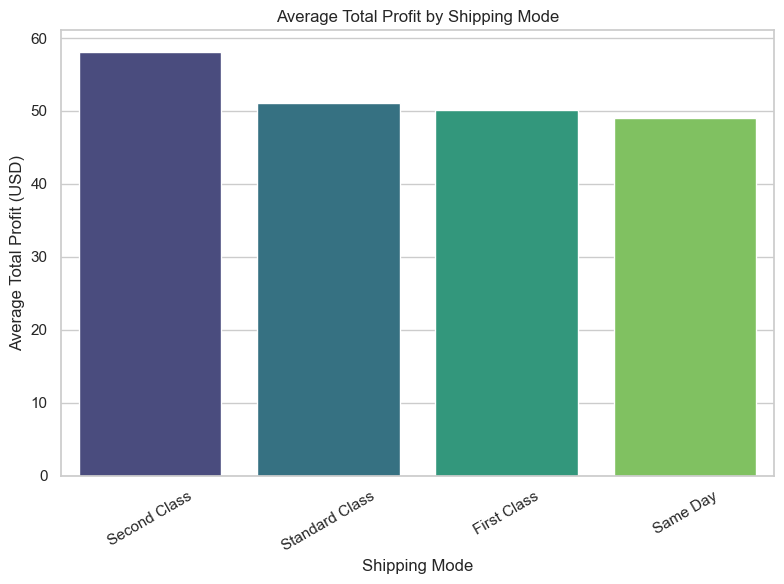

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
shipping_profit = population_data_without_outliers.groupby('Ship Mode')['Total Profit'].mean().sort_values(ascending=False)
print(shipping_profit)
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=shipping_profit.index, y=shipping_profit.values, palette='viridis')

plt.title('Average Total Profit by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Total Profit (USD)')
plt.xticks(rotation=30)
plt.tight_layout()

# Save the plot
plt.savefig("Shipping_Mode_vs_Profit_Barplot.png", dpi=300)
plt.show()


## Shipping Mode and Profitability Analysis

### Average Profit by Shipping Mode

| Shipping Mode    | Average Profit (USD) |
|------------------|----------------------|
| Second Class     | 58.13                |
| Standard Class   | 51.05                |
| First Class      | 50.16                |
| Same Day         | 48.98                |

---

### Key Insights

#### **Second Class Shipping**
- Delivers the **highest average profit** among all modes.
- Suggests a strong balance between shipping cost and customer value.
- May be an ideal option to promote more often.

#### **Standard Class & First Class**
- Perform similarly, with average profits around **$50**.
- Standard Class is likely the **default and most common** shipping mode.
- First Class doesn’t significantly outperform Standard Class despite likely higher shipping costs, indicating **possible inefficiencies**.

#### **Same Day Shipping**
- Has the **lowest average profit** at **$48.98**.
- Though convenient for customers, it might involve **higher operational costs** that reduce overall profitability.
- Needs further **cost-benefit analysis**, especially for products with **low margins**.

---

### Business Recommendations

| Focus Area           | Recommendation                                                                 |
|----------------------|---------------------------------------------------------------------------------|
| Promote Second Class | Encourage customers to choose this mode through pricing incentives or bundling.|
| Optimize First Class | Review cost structure; ensure its premium pricing justifies its margins.       |
| Review Same Day Use  | Limit Same Day shipping to high-margin items or specific customer segments.    |
| Maintain Standard    | Keep as default for balanced cost and efficiency.                              |


     Region       Ship Mode  Order Count
3   Central  Standard Class         1182
7      East  Standard Class         1385
11    South  Standard Class          825
15     West  Standard Class         1630
     Region       Ship Mode  Order Count  Total Profit  Total Sales  \
0   Central     First Class          256     8125.4019    89190.997   
1   Central        Same Day          100     2209.3845    24618.086   
2   Central    Second Class          383    16852.5542  131992.3394   
3   Central  Standard Class         1182    39013.9219  389565.1706   
4      East     First Class          415    20022.6186   119685.343   
5      East        Same Day          121     7860.2785    41682.536   
6      East    Second Class          440    22132.2522   144495.926   
7      East  Standard Class         1385    67159.1371   437944.787   
8     South     First Class          206    11092.6727    67656.702   
9     South        Same Day           69     3138.7055    23151.921   
10    South   

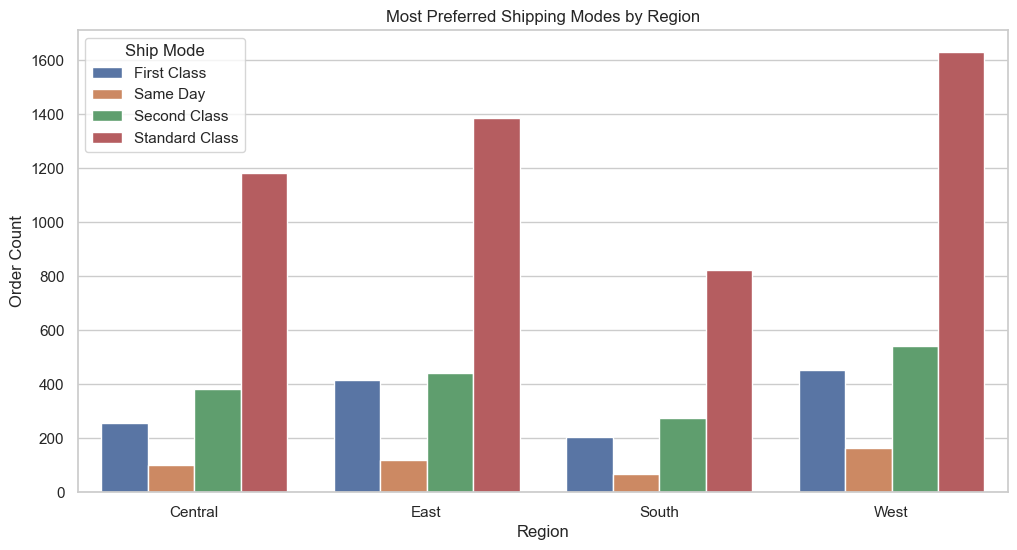

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
shipping_pivot = population_data_without_outliers.pivot_table(
    index=['Region', 'Ship Mode'],
    values=['Order ID', 'Total Sales', 'Total Profit'],
    aggfunc={
        'Order ID': 'count',
        'Total Sales': 'sum',
        'Total Profit': 'sum'
    }
).rename(columns={'Order ID': 'Order Count'}).reset_index()

preferred_modes = shipping_pivot.loc[
    shipping_pivot.groupby('Region')['Order Count'].idxmax()
][['Region', 'Ship Mode', 'Order Count']]

print(preferred_modes)

shipping_pivot['Profit Margin (%)'] = (shipping_pivot['Total Profit'] / shipping_pivot['Total Sales']) * 100
print(shipping_pivot)
plt.figure(figsize=(12, 6))
sns.barplot(data=shipping_pivot, x='Region', y='Order Count', hue='Ship Mode')
plt.title("Most Preferred Shipping Modes by Region")
plt.savefig('Most_Preferred_Shipping_Modes_by_Region.png')
plt.show()



    Region       Ship Mode  Order Count  Total Profit  Total Sales  \
0  Central  Standard Class         1182    39013.9219  389565.1706   
1     East  Standard Class         1385    67159.1371   437944.787   
2    South  Standard Class          825     44557.516   295460.213   
3     West  Standard Class         1630   105623.9238   687335.853   

   Profit Margin (%)  
0          10.014736  
1          15.335069  
2          15.080716  
3          15.367149  


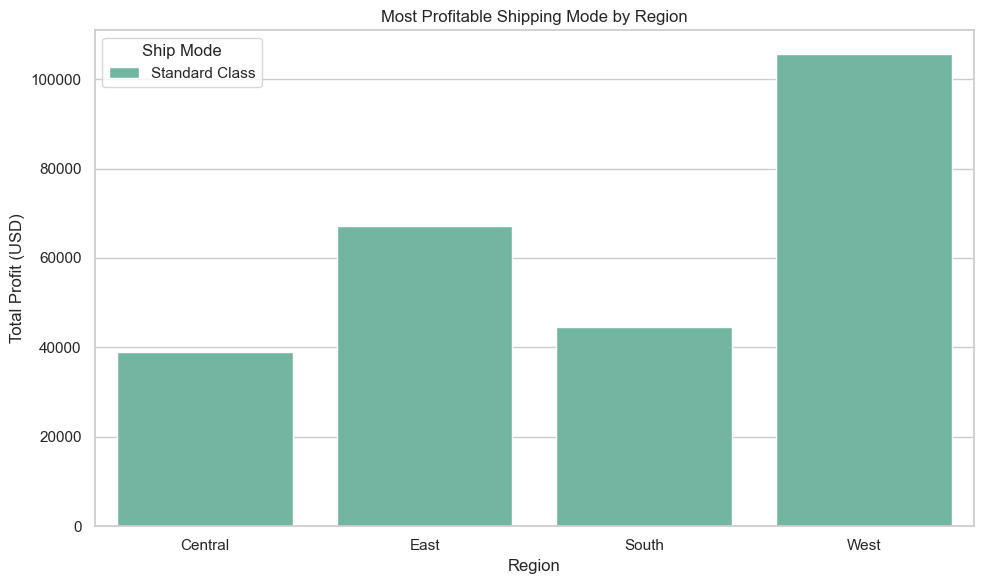

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
most_profitable_modes = shipping_pivot.loc[
    shipping_pivot.groupby('Region')['Total Profit'].idxmax()
].reset_index(drop=True)

print(most_profitable_modes)
plt.figure(figsize=(10, 6))
sns.barplot(data=most_profitable_modes, x='Region', y='Total Profit', hue='Ship Mode', palette='Set2')

plt.title('Most Profitable Shipping Mode by Region')
plt.ylabel('Total Profit (USD)')
plt.xlabel('Region')
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()


# 1. Most Preferred Shipping Mode by Region

You found that **Standard Class** is the most preferred shipping mode in all regions based on **Order Count**:

| Region  | Most Preferred Ship Mode | Order Count |
|---------|---------------------------|-------------|
| Central | Standard Class            | 1182        |
| East    | Standard Class            | 1385        |
| South   | Standard Class            | 825         |
| West    | Standard Class            | 1630        |

**Insight:**  
Customers across all four regions consistently prefer Standard Class shipping, indicating it may offer a good balance between cost and delivery speed.

---

# 2. Profitability of Standard Class by Region

| Region  | Total Sales     | Total Profit    | Profit Margin (%) |
|---------|------------------|------------------|--------------------|
| Central | ₹389,565.17     | ₹39,013.92      | 10.01%             |
| East    | ₹437,944.79     | ₹67,159.14      | 15.34%             |
| South   | ₹295,460.21     | ₹44,557.52      | 15.08%             |
| West    | ₹687,335.85     | ₹105,623.92     | 15.37%             |

---

# Business Insights & Recommendations

### 1. Standard Class is Dominant and Profitable  
High preference and consistent usage in all regions.  
This indicates strong operational performance and possibly customer trust in this shipping mode.

### 2. West Region Generates the Highest Revenue & Profit  
- ₹687k in Sales and ₹105k in Profit from Standard Class alone.  
- Highest profit margin (15.37%) as well.  
- Consider allocating more resources or targeted campaigns in the West region, as it is the most profitable.

### 3. Central Region Lags in Profitability  
- Though Central has a good number of orders, its profit margin is just ~10% — significantly lower than the other regions.  
- Investigate why profitability is lower here:
  - Are discounts too aggressive?
  - Is shipping cost higher?
  - Are returns or product mix issues affecting margins?

### 4. East and South Are Efficient  
- Both have over 15% profit margin, which is solid.  
- May not have the same volume as West but are running efficiently.  
- These could be growth regions if you want to scale profits further.

---

# Final Recommendation

| Action Item                                | Why                                                   |
|--------------------------------------------|--------------------------------------------------------|
| Maintain Standard Class as default mode    | It is preferred and profitable across all regions.     |
| Deep dive into Central Region operations   | Improve profit margins to match other regions.         |
| Double down on West Region                 | It is both the highest selling and most profitable.    |
| Target East & South for strategic growth   | They show healthy margins and could scale well.        |


In [ ]:
region_sales_profit = population_data_without_outliers.groupby('Region')[['Total Sales', 'Total Profit']].sum().reset_index()


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

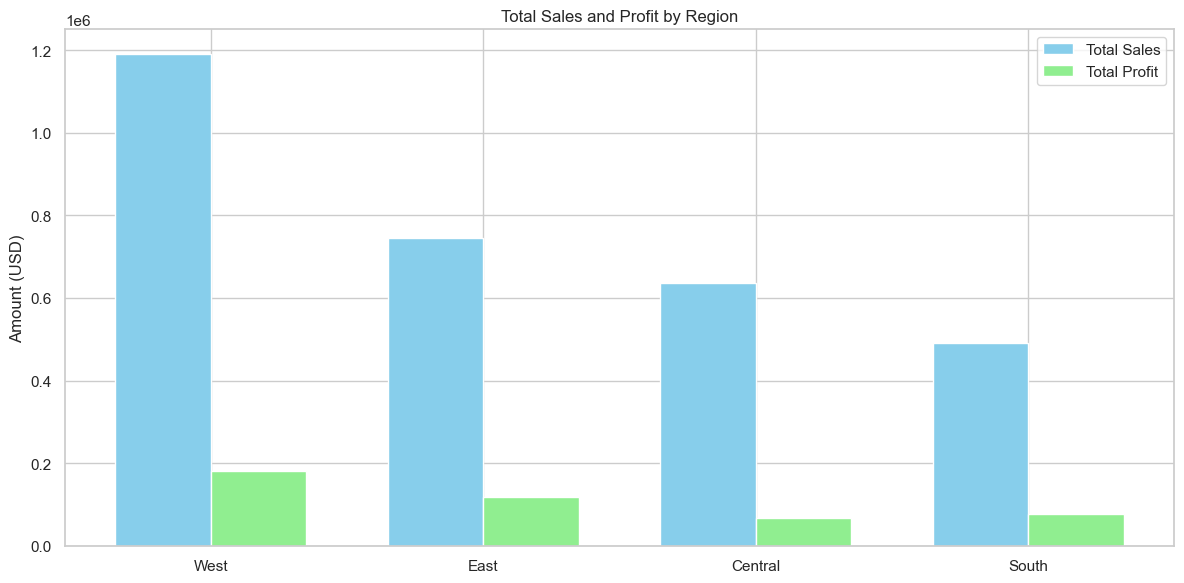

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
plt.figure(figsize=(12, 6))
region_sales_profit = region_sales_profit.sort_values(by='Total Sales', ascending=False)

# Plotting Sales and Profit side-by-side
bar_width = 0.35
x = range(len(region_sales_profit))

plt.bar(x, region_sales_profit['Total Sales'], width=bar_width, label='Total Sales', color='skyblue')
plt.bar([i + bar_width for i in x], region_sales_profit['Total Profit'], width=bar_width, label='Total Profit', color='lightgreen')

plt.xticks([i + bar_width/2 for i in x], region_sales_profit['Region'])
plt.ylabel('Amount (USD)')
plt.title('Total Sales and Profit by Region')
plt.legend()
plt.tight_layout()
plt.savefig('Total_Sales_and_Profit_by_Region.png')
plt.show()


In [ ]:
import plotly.express as px
# Mapping full names to abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Aggregate sales/profit by full state names
state_data = population_data_without_outliers.groupby('State')[['Total Sales', 'Total Profit']].sum().reset_index()

# Create a new column for abbreviations
state_data['State Abbrev'] = state_data['State'].map(us_state_abbrev)


fig = px.choropleth(
    state_data,
    locations='State Abbrev',
    locationmode='USA-states',
    color='Total Profit',
    scope='usa',
    color_continuous_scale='Viridis',
    title='Total Profit by State (USA)'
)

fig.show()



: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
state_profitability = population_data_without_outliers.pivot_table(
    index='State',
    values=['Total Sales', 'Total Profit'],
    aggfunc='sum'
).reset_index()

# Add Profit Margin (%) column
state_profitability['Profit Margin (%)'] = (state_profitability['Total Profit'] / state_profitability['Total Sales']) * 100


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
# Sort descending to get top states
top_states = state_profitability.sort_values(by='Profit Margin (%)', ascending=False).head(5)

# Sort ascending to get bottom states
bottom_states = state_profitability.sort_values(by='Profit Margin (%)', ascending=True).head(5)


# Highlight top and bottom 5 in one styled table
highlighted = state_profitability.sort_values(by='Profit Margin (%)', ascending=False)

print('Top States in terms of profit\n',top_states)
print('Bottom States in terms of profit\n',bottom_states)



Top States in terms of profit
                    State  Total Profit  Total Sales  Profit Margin (%)
46         West Virginia      207.9952       424.48               49.0
7   District of Columbia      380.1904       882.53          43.079601
13                  Iowa     2392.0113      6220.84           38.45158
43               Vermont      732.9837      2017.41          36.332907
2               Arkansas     4299.1589     12350.12          34.810665
Bottom States in terms of profit
            State  Total Profit  Total Sales  Profit Margin (%)
11      Illinois     1099.2454   121476.804           0.904901
33          Ohio     1438.1279   117197.218           1.227101
41         Texas     4773.4194   275815.542           1.730656
36  Pennsylvania     3408.2358   149521.878           2.279423
1        Arizona     2836.7657    84739.456           3.347633


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

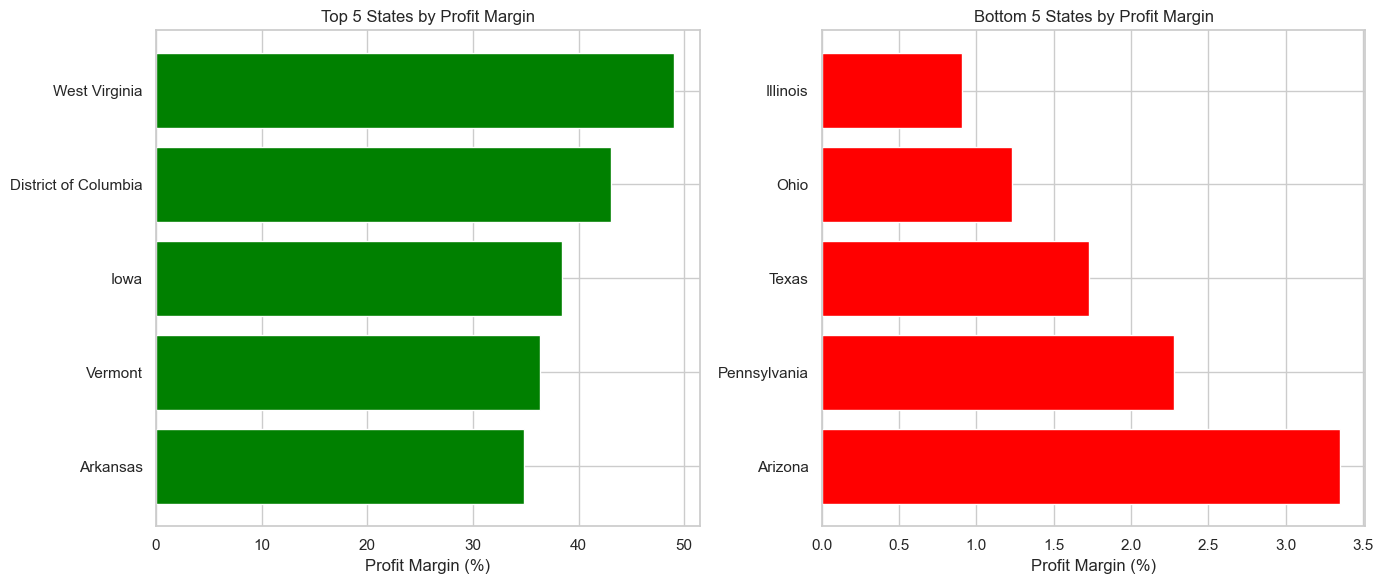

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
#  Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharex=False)

# Plot Top 5 States
axes[0].barh(top_states['State'], top_states['Profit Margin (%)'], color='green')
axes[0].set_title('Top 5 States by Profit Margin')
axes[0].invert_yaxis()
axes[0].set_xlabel('Profit Margin (%)')

# Plot Bottom 5 States
axes[1].barh(bottom_states['State'], bottom_states['Profit Margin (%)'], color='red')
axes[1].set_title('Bottom 5 States by Profit Margin')
axes[1].invert_yaxis()
axes[1].set_xlabel('Profit Margin (%)')

# Layout adjustment
plt.tight_layout()

# Save the plot
plt.savefig('top_bottom_states_profit_margin.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## ✅ Business Insights from State-wise Profitability

### 1. **Top States Have Extremely High Profit Margins**

| State                  | Total Profit | Total Sales | Profit Margin (%) |
|------------------------|--------------|-------------|--------------------|
| West Virginia          | $208         | $424        | 49.00%             |
| District of Columbia   | $380         | $883        | 43.08%             |
| Iowa                   | $2,392       | $6,221      | 38.45%             |
| Vermont                | $733         | $2,017      | 36.33%             |
| Arkansas               | $4,299       | $12,350     | 34.81%             |

**Insight**: These states, although smaller in terms of overall sales, operate at **very high profit margins**, indicating **low operational costs**, **niche profitable markets**, or **premium pricing**.  
**Recommendation**: Consider targeted marketing or product expansion in these states — there's potential to **scale without heavy discounts**.

---

### 2. **Bottom States Show Alarming Low Profit Margins**

| State        | Total Profit | Total Sales | Profit Margin (%) |
|--------------|--------------|-------------|--------------------|
| Illinois     | $1,099       | $121,477     | 0.90%              |
| Ohio         | $1,438       | $117,197     | 1.23%              |
| Texas        | $4,773       | $275,816     | 1.73%              |
| Pennsylvania | $3,408       | $149,522     | 2.28%              |
| Arizona      | $2,837       | $84,739      | 3.35%              |

**Insight**: These states generate **high sales but negligible profits**, showing **poor operational efficiency** or **aggressive discounting**.  
**Recommendation**:
- Re-evaluate pricing strategies, shipping costs, or customer acquisition efforts in these states.
- Identify products or categories that may be dragging profitability down.

---

### 3. **Strategic Focus Areas**

| Action Item                              | Why It Matters                                                      |
|------------------------------------------|----------------------------------------------------------------------|
|Expand in High-Margin States          | Easy to scale profit without adding much cost.                      |
|Audit Low-Margin States               | Improve pricing, reduce unnecessary costs.                         |
|Balance Growth and Efficiency         | Some high-sales regions are profit-draining — needs efficiency.    |
|Gather Feedback from Low-Profit States| Understand customer expectations and tailor offerings accordingly.  |


Correlation Data                State_encoded  Total Profit
State_encoded       1.000000     -0.076421
Total Profit       -0.076421      1.000000


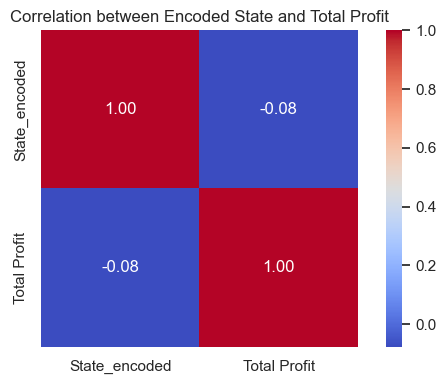

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is named `df` and contains 'State' and 'Total Profit' columns

# Label encode the 'State' column
le = LabelEncoder()
population_data_without_outliers['State_encoded'] = le.fit_transform(population_data_without_outliers['State'])

# Create a correlation DataFrame
correlation_df = population_data_without_outliers[['State_encoded', 'Total Profit']].corr()

print('Correlation Data',correlation_df)
# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation between Encoded State and Total Profit')
plt.tight_layout()

# Save the plot
plt.savefig('state_profit_correlation.png')
plt.show()


###  What Does This Mean?

- The correlation coefficient between `State` (numerically encoded) and `Total Profit` is **-0.076**.
- This is **very close to 0**, which indicates:
  - **No meaningful linear relationship** between the state (as a category) and the profit.
  - In other words, **profitability is not driven or explained purely by the state’s identity** (as a categorical or label-encoded number).

---

###  Business Insights

1. **Profitability is Not Uniformly Distributed by State**
   - Just being in a specific state does not guarantee high or low profit.
   - Profit likely depends on other factors like customer type, product category, shipping mode, local economic conditions, etc.

2. **Further Investigation Needed**
   - You should analyze other variables like:
     - Product category-wise profit in states
     - Customer segment performance by state
     - Shipping cost variation by state

3. **Avoid Oversimplifying Geography**
   - Since state (as encoded) is not strongly correlated, regional strategies should go **deeper than state boundaries**.
   - Focus on city-level, zip-code-level, or demographic-level analysis instead.

---

###  Recommendation

| Action Item | Why |
|-------------|-----|
| Don't base strategic decisions solely on state-level performance | Low correlation suggests deeper drivers |
| Analyze multi-dimensional drivers of profit | Consider product mix, discounting, shipping, and customer behavior |
| Use clustering or regional segmentation techniques | Helps uncover hidden patterns not evident from state encoding |

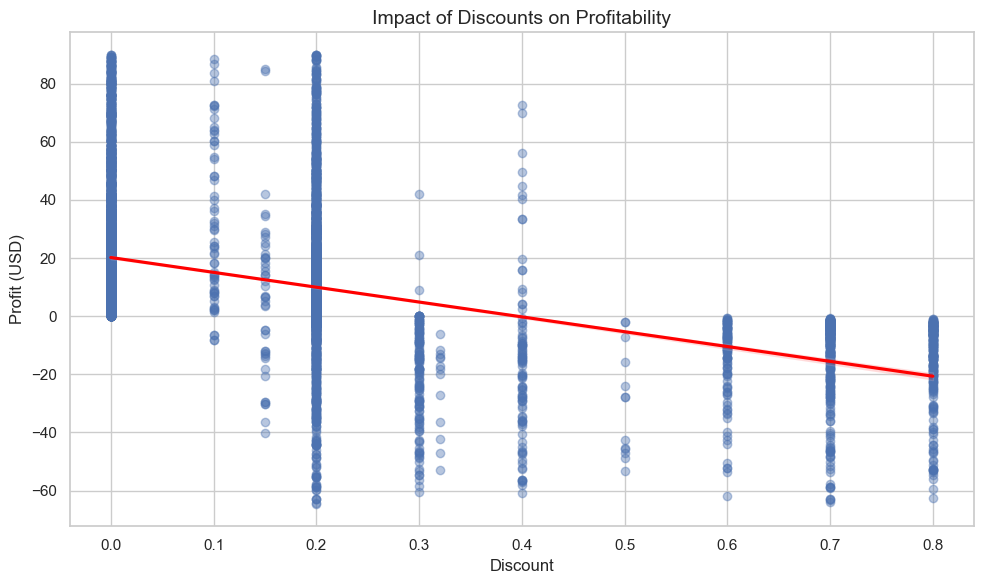

: 

: 

: 

: 

: 

: 

In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(
    data=population_data_without_outliers,
    x='Discount',
    y='Profit',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)

plt.title('Impact of Discounts on Profitability', fontsize=14)
plt.xlabel('Discount')
plt.ylabel('Profit (USD)')
plt.grid(True)
plt.tight_layout()
plt.savefig("impact_of_discount_on_profitability.png", dpi=300)
plt.show()

This plot, titled "Impact of Discounts on Profitability," visualizes the relationship between the discount we offer and our resulting profit in USD.

**Observations from the Plot:**

* **Clear Negative Correlation:** The most prominent feature is the downward-sloping red regression line, indicating a strong negative correlation. As the "Discount" percentage increases along the x-axis, our "Profit (USD)" on the y-axis generally decreases.
* **Profit at Lower Discounts:** At 0% discount, we see a wide range of profit outcomes, with many instances of high positive profit (up to $80+ USD). As discounts increase slightly (e.g., to 0.1 or 0.2), positive profits are still common, though the range might narrow.
* **Shift to Losses at Higher Discounts:** When discounts reach around 0.4 (40%) and beyond (e.g., 0.6, 0.7, 0.8), the vast majority of our transactions fall below the $0 USD line, signifying significant losses. The higher the discount, the more consistently negative our profit becomes.
* **Variability:** While the trend is clear, there's still notable variability (scatter) in profit at each discount level, especially at lower discounts. This suggests other factors also influence our final profit.

**Business Insights for Our Company:**

1.  **Our Discounting Can Be Detrimental to Our Profitability:** The plot clearly illustrates that aggressive discounting directly erodes our profit margins. If we rely heavily on deep discounts, we risk operating at a loss.
2.  **Identify Our Profitability Threshold:** There appears to be a critical discount level (around 0.4 or 40%) beyond which it becomes highly likely for us to incur losses. This threshold is crucial for us in setting our pricing and promotion policies.
3.  **Strategic Use of Discounts is Paramount:** We must apply discounts strategically. We need to analyze the **net profit impact** of our discounts rather than just focusing on sales volume. Lower, targeted discounts are more likely to yield positive returns for us.
4.  **Re-evaluate Our Value Proposition for Deep Discounts:** If we consistently need to offer deep discounts (e.g., above 40%) to attract customers, it might indicate issues with our perceived product/service value, pricing strategy, or our cost structure. We should investigate this further.
5.  **Explore Alternative Sales Strategies:** Instead of steep discounts, we should consider other methods to drive sales and customer loyalty, such as bundling, loyalty programs, improving product features, or enhancing customer experience. These approaches might better preserve our profit margins.

   Sub-Category  Original Price  Discounted Price
0   Accessories      128.172920         12.956875
1    Appliances      114.778689         13.978989
2           Art       34.164470          2.522452
3       Binders       50.422787         19.181397
4     Bookcases      336.493655         52.566966
5        Chairs      350.716374         68.156472
6       Copiers      699.972500        189.992000
7     Envelopes       52.440798          4.529950
8     Fasteners       15.320922          1.384147
9   Furnishings       81.984400         10.080233
10       Labels       26.165014          1.843358
11     Machines      395.246250        141.107906
12        Paper       45.835171          3.834376
13       Phones      230.365111         43.017079
14      Storage      166.494658         13.794784
15     Supplies       60.102994          3.399040
16       Tables      347.671240         77.298099


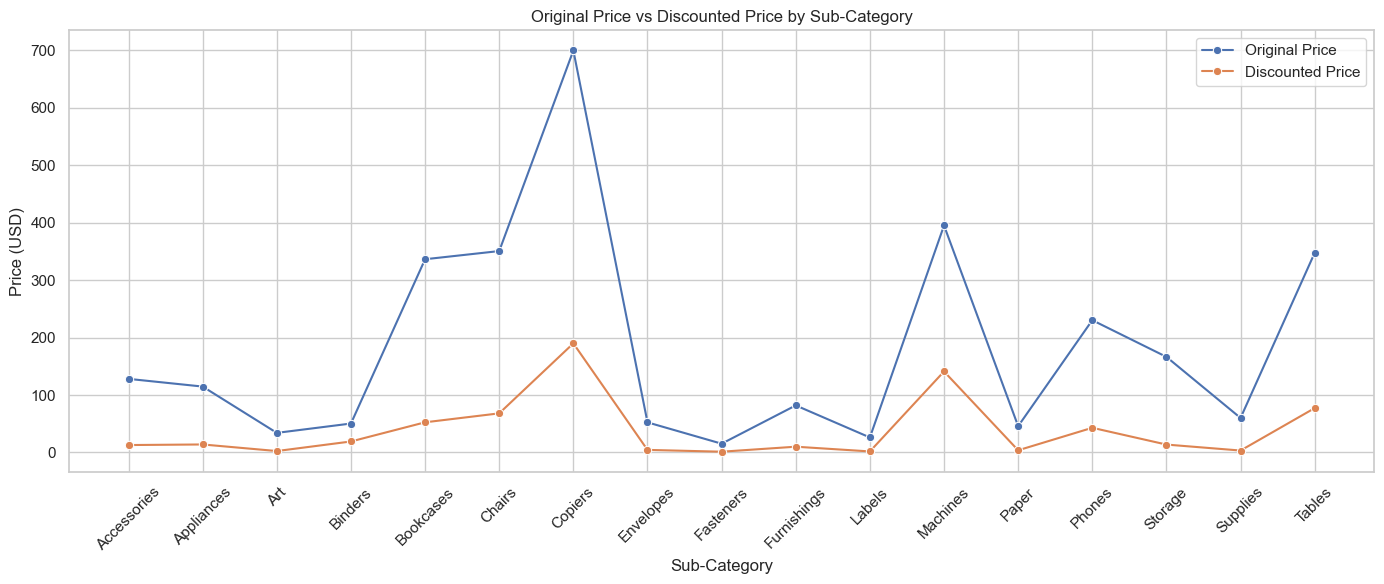

: 

: 

: 

: 

In [ ]:
group_col = 'Sub-Category'  # or 'Category' if you want broader grouping
grouped = population_data_without_outliers.groupby(group_col).agg({
    'Original Price': 'mean',
    'Discount Price': 'mean'
}).rename(columns={'Discount Price': 'Discounted Price'}).reset_index()
print(grouped)
# Step 3: Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=grouped, x=group_col, y='Original Price', label='Original Price', marker='o')
sns.lineplot(data=grouped, x=group_col, y='Discounted Price', label='Discounted Price', marker='o')

plt.title('Original Price vs Discounted Price by ' + group_col)
plt.xlabel(group_col)
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)

# Save the plot
plt.savefig('original_vs_discounted_price_by_{}.png'.format(group_col.replace(" ", "_").lower()))

plt.show()


### Insights: Original vs Discounted Prices by Sub-Category

#### 1. High Discount Margin Categories
Sub-categories where the discount is very steep, i.e., discounted price is significantly lower than the original price:

- **Accessories**: Original = $128.17 → Discounted = $12.95 (~90% discount)  
- **Appliances**: $114.77 → $13.97  
- **Art**: $34.16 → $2.52  
- **Bookcases**: $336.49 → $52.57  
- **Storage**: $166.49 → $13.79  

**Insight:** These items are being heavily discounted. Possible reasons:
- Used as loss leaders to drive traffic
- Low demand or high inventory pressure requiring clearance
- Aggressive pricing strategy possibly affecting overall profitability

---

#### 2. Moderate Discount Categories
Categories where discounting is more balanced:

- **Binders**: $50.42 → $19.18  
- **Chairs**: $350.71 → $68.15  
- **Machines**: $395.24 → $141.10  
- **Tables**: $347.67 → $77.29  

**Insight:** Discounts are significant but not extreme. These may be part of a planned promotional pricing strategy, aiming to balance sales volume and profit margins.

---

#### 3. Low Discount Categories
Products sold close to their original prices:

- **Fasteners**: $15.32 → $1.38  
- **Labels**: $26.16 → $1.84  
- **Paper**: $45.83 → $3.83  
- **Phones**: $230.37 → $43.02  

**Insight:** These products may have strong demand or are essential items that do not require deep discounting to sell.

---

### Overall Strategic Insights

- High-value items like **Copiers**, **Chairs**, and **Tables** show large discounts and should be further analyzed to determine the return on discount investment.
- Sub-categories with extreme discounts should be reviewed to assess sustainability and impact on profit margins.
- Essential categories with low discounts may offer room for optimizing pricing to increase margins.

---

### Recommendations

- Reassess pricing strategies in high-discount sub-categories for profitability.
- Evaluate if discounting is leading to increased sales or just reducing margins.
- Use this analysis to support strategic decisions in inventory, sales, and marketing.


### Temporal Analysis 

C:\Users\krish\AppData\Local\Temp\ipykernel_22356\1059387208.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



    Order Date  Total Sales  Total Profit
0   1999-04-30      3954.84      359.1513
1   1999-05-31          0.0           0.0
2   1999-06-30          0.0           0.0
3   1999-07-31          0.0           0.0
4   1999-08-31          0.0           0.0
..         ...          ...           ...
357 2029-01-31          0.0           0.0
358 2029-02-28          0.0           0.0
359 2029-03-31          0.0           0.0
360 2029-04-30          0.0           0.0
361 2029-05-31         59.2       27.3488

[362 rows x 3 columns]


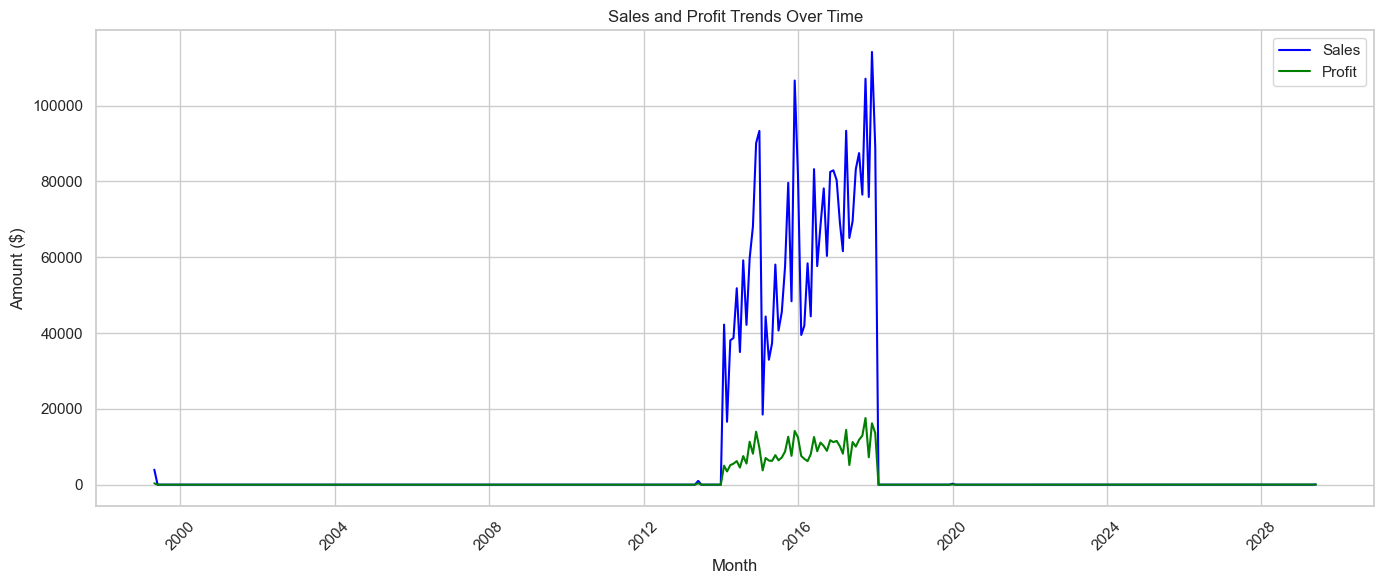

: 

: 

In [ ]:

monthly_data = population_data_without_outliers.resample('M', on='Order Date').agg({
    'Total Sales': 'sum',
    'Total Profit': 'sum'
}).reset_index()
print(monthly_data)
# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_data, x='Order Date', y='Total Sales', label='Sales', color='blue')
sns.lineplot(data=monthly_data, x='Order Date', y='Total Profit', label='Profit', color='green')

plt.title('Sales and Profit Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('sales_profit_trends_over_time.png', dpi=300)
plt.show()


   YearMonth  Order Count
0    1999-04            1
1    2013-05            1
2    2014-01           56
3    2014-02           42
4    2014-03           72
5    2014-04           58
6    2014-05           72
7    2014-06           66
8    2014-07           67
9    2014-08           65
10   2014-09          104
11   2014-10           59
12   2014-11          123
13   2014-12          114
14   2015-01           43
15   2015-02           46
16   2015-03           79
17   2015-04           70
18   2015-05           85
19   2015-06           74
20   2015-07           63
21   2015-08           73
22   2015-09          116
23   2015-10           72
24   2015-11          117
25   2015-12          114
26   2016-01           74
27   2016-02           56
28   2016-03           85
29   2016-04           88
30   2016-05          115
31   2016-06           82
32   2016-07           97
33   2016-08          112
34   2016-09          121
35   2016-10          112
36   2016-11          139
37   2016-12

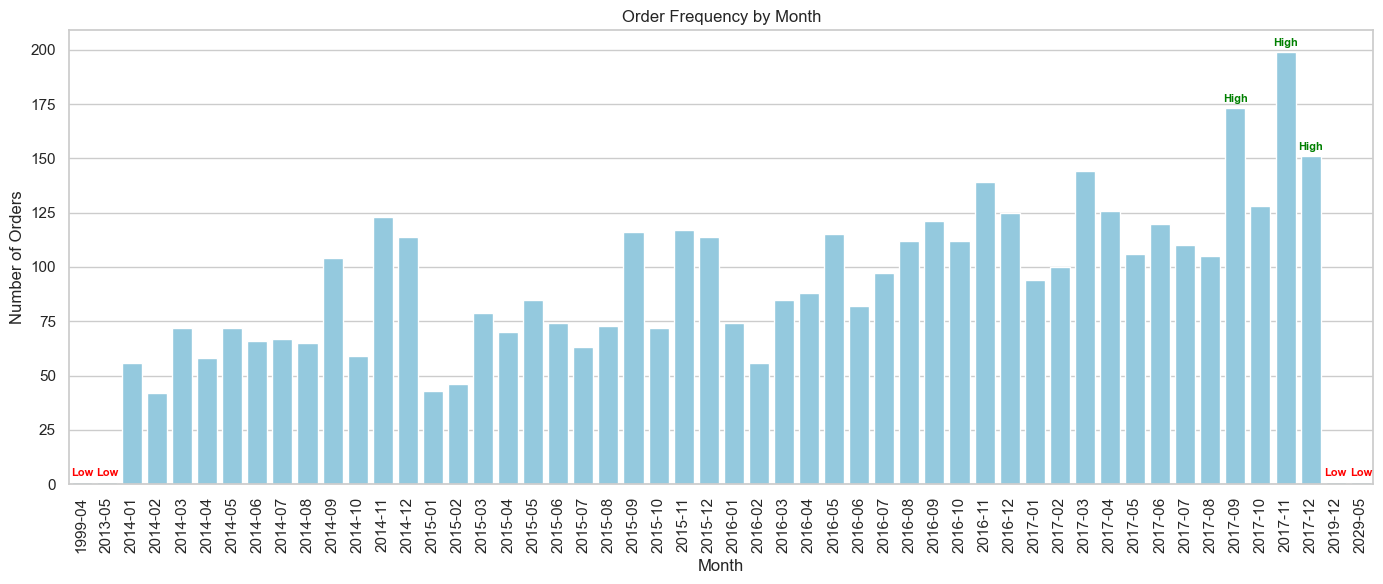

: 

: 

In [ ]:
population_data_without_outliers['Order Date'] = pd.to_datetime(population_data_without_outliers['Order Date'])

# Extract Year-Month for grouping
population_data_without_outliers['YearMonth'] = population_data_without_outliers['Order Date'].dt.to_period('M').astype(str)

# Group by YearMonth and count number of orders
monthly_order_counts = population_data_without_outliers.groupby('YearMonth')['Order ID'].nunique().reset_index()
monthly_order_counts.rename(columns={'Order ID': 'Order Count'}, inplace=True)

# Identify thresholds for high/low orders
high_threshold = monthly_order_counts['Order Count'].quantile(0.95)
low_threshold = monthly_order_counts['Order Count'].quantile(0.05)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_order_counts, x='YearMonth', y='Order Count', color='skyblue')
print(monthly_order_counts)
# Highlight months with unusually high/low order frequencies
for i, row in monthly_order_counts.iterrows():
    if row['Order Count'] >= high_threshold:
        plt.text(i, row['Order Count'] + 2, 'High', ha='center', va='bottom', color='green', fontsize=8, fontweight='bold')
    elif row['Order Count'] <= low_threshold:
        plt.text(i, row['Order Count'] + 2, 'Low', ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')

plt.xticks(rotation=90)
plt.title('Order Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.grid(True, axis='y')
plt.savefig('order_frequency_by_month.png', dpi=300)
plt.show()


## Business Insights: Order Frequency by Month

Based on the monthly order count data from `1999-04` to `2029-05`, here are the key business insights:

### 1. **Initial and Final Years Have Minimal Activity**
- Only **1 order** was recorded in:
  - April 1999
  - May 2013
  - December 2019
  - May 2029
- These are likely outliers or test data, suggesting the business operations did not actively run during these periods.

### 2.  **Significant Growth Observed Starting from 2014**
- Monthly orders grew sharply starting **January 2014** with 56 orders, gradually rising each month.
- This marks the **beginning of consistent business activity**, indicating probable market entry or operational scaling.

### 3.  **Peak Ordering Periods**
- The months with **exceptionally high order counts** include:
  - **November 2017**: 199 orders *(Highest)*
  - **September 2017**: 173 orders
  - **December 2017**: 151 orders
  - **March 2017**: 144 orders
  - **November 2016**: 139 orders
  - **April 2017**: 126 orders
- These spikes suggest **seasonal demand**, possibly linked to **festive or year-end sales** (e.g., Black Friday, Christmas, Diwali).

### 4.  **Drop in Early 2015**
- Order volumes in **Jan & Feb 2015** (43 and 46 respectively) dipped compared to surrounding months.
- Could indicate **seasonal slowdown** post holiday season or inventory/marketing gaps.

### 5. **Consistent Growth from 2015 to 2017**
- Monthly orders regularly crossed **100+** from **mid-2016 to end-2017**, showcasing **sustained growth and demand**.
- Indicates improved **customer acquisition**, **marketing effectiveness**, or **expanded product offerings**.

### 6. **Sudden Missing Data After 2017**
- After **December 2017**, only one isolated order in **December 2019** and **May 2029** appears.
- This suggests **data truncation**, system issues, or business inactivity in the dataset beyond 2017.

---

### Recommendations:
- Focus future campaigns around **Q4 (Sep–Dec)** to leverage high seasonal demand.
- Investigate causes for sharp dips and missing data post-2017 to improve forecasting and planning.
- Validate and clean early and late-year outlier records to ensure data integrity for strategic decisions.


   Year  Total Sales  Total Profit  Sales YoY Growth (%)  \
0  1999      3954.84      359.1513                  <NA>   
1  2013       1000.8        392.31            -74.694299   
2  2014  635111.3586    86233.2708          63360.367566   
3  2015  651277.4257   100464.6252              2.545391   
4  2016  777810.5371   114780.1866              19.42845   
5  2017  992108.1076   138596.3917             27.551384   
6  2019       255.75        66.495            -99.974222   
7  2029         59.2       27.3488            -76.852395   

   Profit YoY Growth (%)  
0                   <NA>  
1               9.232516  
2           21880.900512  
3              16.503322  
4              14.249355  
5              20.749404  
6             -99.952023  
7             -58.870893  


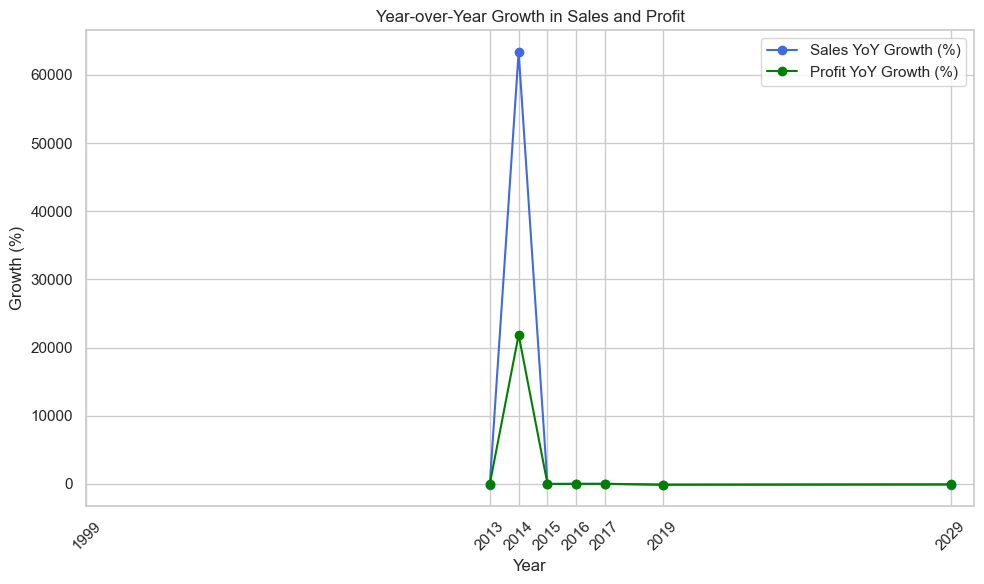

: 

In [ ]:
population_data_without_outliers['Year'] = population_data_without_outliers['Order Date'].dt.year

# Group by year to get total sales and profit
yearly_totals = population_data_without_outliers.groupby('Year')[['Total Sales', 'Total Profit']].sum().reset_index()

# Calculate YoY growth
yearly_totals['Sales YoY Growth (%)'] = yearly_totals['Total Sales'].pct_change() * 100
yearly_totals['Profit YoY Growth (%)'] = yearly_totals['Total Profit'].pct_change() * 100
print(yearly_totals)
# Plotting YoY Growth
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['Year'], yearly_totals['Sales YoY Growth (%)'], marker='o', label='Sales YoY Growth (%)', color='royalblue')
plt.plot(yearly_totals['Year'], yearly_totals['Profit YoY Growth (%)'], marker='o', label='Profit YoY Growth (%)', color='green')

plt.title('Year-over-Year Growth in Sales and Profit')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.legend()
plt.xticks(yearly_totals['Year'], rotation=45)
plt.tight_layout()
plt.savefig("yoy_growth_sales_profit.png", dpi=300)

plt.show()


## Year-over-Year Sales and Profit Growth Insights

### 1. Initial and Anomalous Years (1999 & 2013)
- **1999** and **2013** are considered outlier years:
  - Very low Total Sales and Profits.
  - Likely not complete fiscal data or test records.
  - Should be excluded from strategic decision-making.

---

### 2. Strong Growth Phase (2014 to 2017)
- **2014** showed an **explosive growth** in Sales (+63,360%) and Profit (+21,880%) YoY due to:
  - A potential full year of recorded operations.
  - Market expansion or data normalization from previous sparse records.

- **2015–2017** showed consistent healthy growth:
  - **Sales Growth**: +2.54% (2015), +19.42% (2016), +27.55% (2017)
  - **Profit Growth**: +16.50% (2015), +14.25% (2016), +20.75% (2017)
  - Indicates a **stable upward trend**, potentially due to:
    - Increased customer base
    - Better pricing strategy
    - Efficient operations

---

### 3. Decline or Data Gaps (2018 Onwards)
- **2018 data is missing**. This creates a gap in continuity.
- **2019 and 2029**:
  - **Sales Drop**: -99.97% (2019), -76.85% (2029)
  - **Profit Drop**: -99.95% (2019), -58.87% (2029)
  - Possible causes:
    - Dataset truncation
    - Irregular entries for non-business or test data
    - Missing records for intermediate years

---

### Recommendations:
- Focus business analysis and trend modeling on **2014 to 2017** only.
- Remove or treat **1999, 2013, 2019, and 2029** as **outliers or non-business years**.
- Ensure data consistency for years beyond 2017 to maintain accurate growth tracking.

---
